# Group 12 - Fingerhut FreshStart Customer Behavior Analysis

## Import Basic Libraries (specific libraries imported later)

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mchmm as mc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pydtmc

## EDA

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
# import datasets

fingerhut = pd.read_csv('../Dataset/export.csv')
event_def = pd.read_csv('../Dataset/event_definitions.csv')

In [ ]:
# Count how many rows have event_name == "order_shipped"

len(fingerhut[fingerhut['event_name'] == 'order_shipped'])

322949

In [ ]:
event_def

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
len(event_def)

28

In [ ]:
# find number of unique values in each column

fingerhut.nunique()

customer_id                 1665688
account_id                  1735457
ed_id                            28
event_name                       28
event_timestamp            33672408
journey_steps_until_end        3299
dtype: int64

1) How many observations? What does an observation represent?

In [ ]:
len(fingerhut)

64911906

2) How many customers?

In [ ]:
# number of unique values in 'customer_id' column
print(fingerhut['customer_id'].nunique())

1665688
1735457


4) Do any accounts include more than one customer?  Do any customers have more than 1 account?

In [ ]:
# number of unique values in 'customer_id' column
print(fingerhut['customer_id'].nunique())

# number of unique values in 'account_id' column
print(fingerhut['account_id'].nunique())

1665688
1735457


In [ ]:
account_customer_grouped = fingerhut.groupby('account_id')['customer_id'].nunique()

sum(account_customer_grouped > 1)

310

In [ ]:
customer_account_grouped = fingerhut.groupby('customer_id')['account_id'].nunique()

sum(customer_account_grouped > 1)

68351

5) What time-period is covered? When are "busiest" times.

In [ ]:
# find earliest and latest dates in 'event_timestamp' column

print(fingerhut['event_timestamp'].min())
print(fingerhut['event_timestamp'].max())

2020-11-03T03:31:30.000Z
2023-09-20T12:29:58.000Z


In [ ]:
fingerhut['event_timestamp'] = pd.to_datetime(fingerhut['event_timestamp'])

In [ ]:
print(fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.year).agg('count'))

event_timestamp
2020       46422
2021    30115793
2022    23826852
2023    10922839
Name: event_timestamp, dtype: int64

<AxesSubplot:xlabel='event_timestamp'>

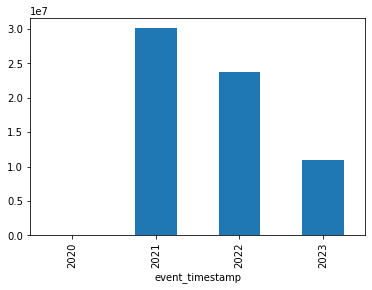

In [ ]:
fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.year).agg('count').plot(kind='bar')

In [ ]:
print(fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.month).agg('count'))

event_timestamp
1     4182881
2     5478495
3     6260453
4     6174741
5     6393195
6     5537276
7     5165159
8     4680412
9     3699536
10    4673370
11    6457975
12    6208413
Name: event_timestamp, dtype: int64

<AxesSubplot:xlabel='event_timestamp'>

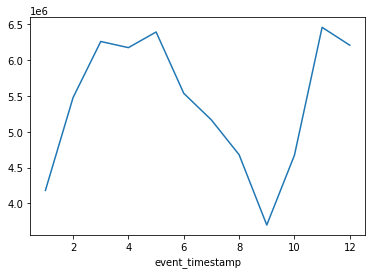

In [ ]:
# extract number of rows for each month in 'event_timestamp' column, and create plot of results

fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.month).agg('count').plot(kind='line')

6) What can you say about the "journey steps until end" variable?

In [ ]:
# Find max journey steps value for each unique customer, and store values in list

unique_accounts = fingerhut['account_id'].unique()


In [ ]:
max_journey_steps = fingerhut.groupby('account_id')['journey_steps_until_end'].max()

<AxesSubplot:>

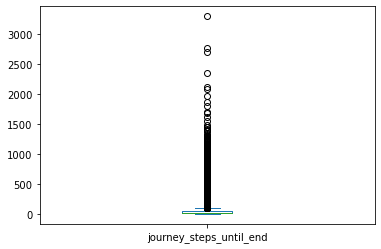

In [ ]:
# make boxplot of max journey steps values

max_journey_steps.plot(kind='box')

In [ ]:
fingerhut['account_id'] == 1773350293

0            True
1            True
2            True
3            True
4            True
            ...  
64911901    False
64911902    False
64911903    False
64911904    False
64911905    False
Name: account_id, Length: 64911906, dtype: bool

In [ ]:
# return row for account_id == -784961211 and ed_id == 12

print(fingerhut[(fingerhut['account_id'] == 1773350293) & (fingerhut['ed_id'] == 12)]['journey_steps_until_end'])

0    1
Name: journey_steps_until_end, dtype: int64


## Data Cleaning

In [ ]:
# import datasets

fingerhut = pd.read_csv('export.csv')
event_def = pd.read_csv('event_definitions.csv')

In [ ]:
# ignoring journey_steps_until_end, find all duplicate rows

figerhut_no_journey_steps_until_end = fingerhut.drop(columns=['journey_steps_until_end'])

duplicates = figerhut_no_journey_steps_until_end[figerhut_no_journey_steps_until_end.duplicated()]

duplicates

In [ ]:
fingerhut_copy = fingerhut.copy()

In [ ]:
# remove fingerhut from memory

del fingerhut

In [ ]:
# finding number of customer_ids per account_id
account_customer_grouped = fingerhut_copy.groupby('account_id')['customer_id'].nunique()

# return only the accounts with more than one customer
account_customer_grouped = account_customer_grouped[account_customer_grouped > 1]

In [ ]:
# finding number of account_ids per customer_id
customer_account_grouped = fingerhut_copy.groupby('customer_id')['account_id'].nunique()

# return only the customers with more than one account
customer_account_grouped = customer_account_grouped[customer_account_grouped > 1]

In [ ]:
# delete journey_steps_until_end column

del fingerhut_copy['journey_steps_until_end']

In [ ]:
# remove duplicate rows

fingerhut_copy = fingerhut_copy[~fingerhut_copy.duplicated()]

In [ ]:
# pull out the accounts with more than one customer

fingerhut_many_customers = fingerhut_copy[fingerhut_copy['account_id'].isin(account_customer_grouped.index)]

# pull out the customers with more than one account

fingerhut_many_accounts = fingerhut_copy[fingerhut_copy['customer_id'].isin(customer_account_grouped.index)]

# take out fingerhut_many_customers and fingerhut_many_accounts from fingerhut_copy

fingerhut_copy = fingerhut_copy[~fingerhut_copy['account_id'].isin(account_customer_grouped.index)]
fingerhut_copy = fingerhut_copy[~fingerhut_copy['customer_id'].isin(customer_account_grouped.index)]

In [ ]:
# reset index for all three dataframes

fingerhut_copy.reset_index(drop=True, inplace=True)
fingerhut_many_customers.reset_index(drop=True, inplace=True)
fingerhut_many_accounts.reset_index(drop=True, inplace=True)

In [ ]:
# create new column in fingerhut_copy called 'combined_id' starting at 0 and incrementing by 1 for each new account_id

fingerhut_copy['combined_id'] = fingerhut_copy.groupby('account_id').ngroup()

In [ ]:
# sort fingerhut_copy by combined_id

fingerhut_copy.sort_values(by=['combined_id'], inplace=True)

In [ ]:
# create new column in fingerhut_many_customers called 'combined_id' starting at fingerhut_copy['combined_id'].max()

fingerhut_many_customers['combined_id'] = fingerhut_many_customers.groupby('account_id').ngroup() + fingerhut_copy['combined_id'].max() + 1

In [ ]:
# sort fingerhut_many_customers by combined_id

fingerhut_many_customers.sort_values(by='combined_id', inplace=True)

In [ ]:
# create new column in fingerhut_many_accounts called 'combined_id' starting at fingerhut_many_customers['combined_id'].max()

fingerhut_many_accounts['combined_id'] = fingerhut_many_accounts.groupby('customer_id').ngroup() + fingerhut_many_customers['combined_id'].max() + 1

In [ ]:
# sort fingerhut_many_accounts by combined_id

fingerhut_many_accounts.sort_values(by='combined_id', inplace=True)

In [ ]:
# append all three dataframes together

fingerhut_combined = fingerhut_copy.append(fingerhut_many_customers)
fingerhut_combined = fingerhut_combined.append(fingerhut_many_accounts)

/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_63647/1808326863.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_combined = fingerhut_copy.append(fingerhut_many_customers)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_63647/1808326863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_combined = fingerhut_combined.append(fingerhut_many_accounts)


In [ ]:
# for each combined_id, sort by event_timestamp

fingerhut_combined.sort_values(by=['combined_id', 'event_timestamp'], inplace=True)

In [ ]:
# reset index of fingerhut_combined

fingerhut_combined.reset_index(drop=True, inplace=True)

In [ ]:
# for every combined_id, add a column called 'journey_steps_until_end' that increments by 1 for each row

fingerhut_combined['journey_steps_until_end'] = fingerhut_combined.groupby('combined_id').cumcount(ascending=True)

In [ ]:
fingerhut_combined

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end
0,1807905151,-2147477843,2,campaign_click,2021-09-03T06:00:00.000Z,0,0
1,1807905151,-2147477843,12,application_web_approved,2021-09-03T21:46:20.000Z,0,1
2,1807905151,-2147477843,1,promotion_created,2021-09-03T21:46:26.680Z,0,2
3,1807905151,-2147477843,4,browse_products,2021-09-03T21:48:59.000Z,0,3
4,1807905151,-2147477843,4,browse_products,2021-09-03T21:55:06.000Z,0,4
...,...,...,...,...,...,...,...
56854843,2147449981,-203497522,4,browse_products,2023-07-22T20:47:49.000Z,1665430,37
56854844,2147449981,-203497522,5,view_cart,2023-07-22T20:47:49.000Z,1665430,38
56854845,2147449981,-203497522,11,add_to_cart,2023-07-22T20:47:49.000Z,1665430,39
56854846,2147449981,-203497522,6,begin_checkout,2023-07-22T20:47:49.000Z,1665430,40


In [ ]:
# export fingerhut_combined to csv

fingerhut_combined.to_csv('fingerhut_combined.csv', index=False)

In [ ]:
fingerhut_combined = pd.read_csv('fingerhut_combined.csv')

In [ ]:
event_definitions = pd.read_csv('event_definitions.csv')

In [ ]:
# find the first instance where ed_id = 24 in fingerhut_combined

fingerhut_combined[fingerhut_combined['ed_id'] == 24].head(1)

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end
397,-1329131321,-2147463068,24,campaignemail_clicked,2021-03-31T16:31:19.000Z,7,2


In [ ]:
# create dictionary based on 'stage' and 'event_definition_id' columns in event_definitions, using 'event_definition_id' as the key and 'stage' as the value

event_dict = event_definitions.set_index('event_definition_id')['stage'].to_dict()

# add additional key value pair
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

event_dict

{15: 'Apply for Credit',
 16: 'Apply for Credit',
 17: 'Apply for Credit',
 12: 'Apply for Credit',
 13: 'Apply for Credit',
 14: 'Apply for Credit',
 3: 'Apply for Credit',
 19: 'Apply for Credit',
 29: 'Credit Account',
 37: 'Credit Account',
 2: 'Discover',
 9: 'Discover',
 10: 'Discover',
 22: 'Discover',
 23: 'Discover',
 27: 'Downpayment',
 26: 'Downpayment',
 8: 'Downpayment',
 25: 'Downpayment',
 11: 'First Purchase',
 6: 'First Purchase',
 4: 'First Purchase',
 18: 'First Purchase',
 7: 'First Purchase',
 5: 'First Purchase',
 28: 'Order Shipped',
 20: 'Prospecting',
 21: 'Prospecting',
 1: 'Promotion Created',
 24: 'Campaignemail Clicked'}

In [ ]:
# append a new column to fingerhut_combined called 'stage' that contains the value from the dictionary based on the 'event_name' column

fingerhut_combined['stage'] = fingerhut_combined['ed_id'].map(event_dict)

In [ ]:
# count number of rows where 'stage' is NaN

fingerhut_combined['stage'].isna().sum()

0

In [ ]:
customer_characteristics = pd.DataFrame(fingerhut_combined['combined_id'].unique(), columns=['combined_id'])

customer_characteristics['application'] = np.nan
customer_characteristics['activation'] = np.nan
customer_characteristics['promotion_exposure'] = np.nan
customer_characteristics['place_order_web'] = np.nan
customer_characteristics['place_order_phone'] = np.nan
customer_characteristics['order_shipped'] = np.nan

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1665426,1665426,NaN,NaN,NaN,NaN,NaN,NaN
1665427,1665427,NaN,NaN,NaN,NaN,NaN,NaN
1665428,1665428,NaN,NaN,NaN,NaN,NaN,NaN
1665429,1665429,NaN,NaN,NaN,NaN,NaN,NaN


### Application

In [ ]:
# check if there are any customers who do not have the 'Apply for Credit' stage in their journey, using groupby:

credit_applications = fingerhut_combined.groupby('combined_id')['stage'].apply(lambda x: 'Apply for Credit' in x.values)

In [ ]:
sum(credit_applications)

1664953

In [ ]:
# based on credit applications modify the customer_characteristics dataframe to add 0 to the 'application' column for customers who do not have the 'Apply for Credit' stage in their journey. Else add 1.

customer_characteristics['application'] = customer_characteristics['combined_id'].map(credit_applications)

customer_characteristics['application'] = customer_characteristics['application'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,NaN,NaN
3,3,1,NaN,NaN,NaN,NaN,NaN
4,4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1665426,1665426,1,NaN,NaN,NaN,NaN,NaN
1665427,1665427,1,NaN,NaN,NaN,NaN,NaN
1665428,1665428,1,NaN,NaN,NaN,NaN,NaN
1665429,1665429,1,NaN,NaN,NaN,NaN,NaN


### Promotion

In [ ]:
promotion_ids = [2, 9, 20, 21, 1, 24]

# check if there are any customers who have not been exposed to any promotions, using groupby (has at least one promotion_id as ed_id):

promotion_exposure = fingerhut_combined.groupby('combined_id')['ed_id'].apply(lambda x: any(i in promotion_ids for i in x.values))

sum(promotion_exposure)

1523909

In [ ]:
# based on promotion exposure modify the customer_characteristics dataframe to add 1 to the 'promotion_exposure' column for customers who have not been exposed to any promotions. Else add 0.

customer_characteristics['promotion_exposure'] = customer_characteristics['combined_id'].map(promotion_exposure)

customer_characteristics['promotion_exposure'] = customer_characteristics['promotion_exposure'].astype(int)

### Activation

In [ ]:
# CHANGING SYSTEM-WIDE TYPO

# change all values 'account_activitation' to 'account_activation' in the 'event_name' column

fingerhut_combined['event_name'] = fingerhut_combined['event_name'].replace('account_activitation', 'account_activation')

In [ ]:
# check if event_name 'account_activitation' is in the journey of each customer using groupby:

account_activations = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'account_activation' in x.values)

account_activations

combined_id
0           True
1           True
2          False
3          False
4           True
           ...  
1665426    False
1665427    False
1665428     True
1665429    False
1665430    False
Name: event_name, Length: 1665431, dtype: bool

In [ ]:
sum(account_activations)

410862

In [ ]:
# based on account_activations modify the customer_characteristics dataframe to add 0 to the 'activation' column for customers who do not have the 'account_activation' stage in their journey. Else add 1.

customer_characteristics['activation'] = customer_characteristics['combined_id'].map(account_activations)

customer_characteristics['activation'] = customer_characteristics['activation'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,1,1,NaN,NaN,NaN
1,1,1,1,1,NaN,NaN,NaN
2,2,1,0,1,NaN,NaN,NaN
3,3,1,0,1,NaN,NaN,NaN
4,4,1,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1665426,1665426,1,0,1,NaN,NaN,NaN
1665427,1665427,1,0,1,NaN,NaN,NaN
1665428,1665428,1,1,1,NaN,NaN,NaN
1665429,1665429,1,0,1,NaN,NaN,NaN


### Placed Order

In [ ]:
# check if 'place_order_phone' or 'place_order_web' is in the journey of each customer using groupby:

place_orders_web = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'place_order_web' in x.values)

place_orders_phone = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'place_order_phone' in x.values)

sum(place_orders_web)
sum(place_orders_phone)

54662

In [ ]:
# based on place_orders modify the customer_characteristics dataframe to add 0 to the 'place_order' column for customers who do not have the 'place_order_phone' or 'place_order_web' stage in their journey. Else add 1.

customer_characteristics['place_order_web'] = customer_characteristics['combined_id'].map(place_orders_web)
customer_characteristics['place_order_phone'] = customer_characteristics['combined_id'].map(place_orders_phone)

customer_characteristics['place_order_web'] = customer_characteristics['place_order_web'].astype(int)
customer_characteristics['place_order_phone'] = customer_characteristics['place_order_phone'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,1,1,1,0,NaN
1,1,1,1,1,1,0,NaN
2,2,1,0,1,0,0,NaN
3,3,1,0,1,0,0,NaN
4,4,1,1,1,1,0,NaN
...,...,...,...,...,...,...,...
1665426,1665426,1,0,1,0,0,NaN
1665427,1665427,1,0,1,0,0,NaN
1665428,1665428,1,1,1,1,0,NaN
1665429,1665429,1,0,1,0,0,NaN


### Order Shipped

In [ ]:
# check if 'order_shipped' is in the journey of each customer using groupby:

order_shipped = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'order_shipped' in x.values)

sum(order_shipped)

320680

In [ ]:
# based on order_shipped modify the customer_characteristics dataframe to add 0 to the 'order_shipped' column for customers who do not have the 'order_shipped' stage in their journey. Else add 1.

customer_characteristics['order_shipped'] = customer_characteristics['combined_id'].map(order_shipped)

customer_characteristics['order_shipped'] = customer_characteristics['order_shipped'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,1,1,1,0,1
1,1,1,1,1,1,0,1
2,2,1,0,1,0,0,0
3,3,1,0,1,0,0,0
4,4,1,1,1,1,0,1
...,...,...,...,...,...,...,...
1665426,1665426,1,0,1,0,0,0
1665427,1665427,1,0,1,0,0,0
1665428,1665428,1,1,1,1,0,1
1665429,1665429,1,0,1,0,0,0


In [ ]:
# export the customer_characteristics dataframe as a pickle file

customer_characteristics.to_pickle('../Dataset/customer_characteristics.pkl')

### Wide Dataframe (events as lists)

In [ ]:
# groupby 'combined_id' and store the 'ed_id' and 'stage' as a list in columns named 'ed_ids' and 'stages'

fingerhut_combined_grouped = fingerhut_combined.groupby('combined_id').agg({'ed_id': list, 'stage': list, 'event_timestamp': list}).reset_index()

fingerhut_combined_grouped

,combined_id,ed_id,stage,event_timestamp
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...","[2021-09-03T06:00:00.000Z, 2021-09-03T21:46:20..."
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...","[2021-02-20T06:00:00.000Z, 2021-02-20T22:23:39..."
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2022-12-11T07:43:02.000Z, 2022-12-11T07:43:04..."
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]","[2023-07-02T13:43:31.000Z, 2023-07-02T19:43:31..."
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...","[2021-11-20T14:49:13.000Z, 2021-11-20T14:52:13..."
...,...,...,...,...
1665426,1665426,"[12, 4, 4, 4, 4, 4, 4, 11, 4, 11, 4, 4, 4, 4, ...","[Apply for Credit, First Purchase, First Purch...","[2021-03-24T11:00:21.000Z, 2021-03-24T11:07:37..."
1665427,1665427,"[3, 3, 3, 3, 3, 12, 4, 4, 4, 4, 4, 4, 1, 1, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2021-08-02T16:17:10.000Z, 2021-08-02T16:18:38..."
1665428,1665428,"[5, 5, 19, 19, 19, 19, 19, 19, 19, 19, 3, 12, ...","[First Purchase, First Purchase, Apply for Cre...","[2022-05-22T19:14:41.000Z, 2022-05-22T19:29:11..."
1665429,1665429,"[2, 12, 4, 4, 4, 4, 4, 11, 5, 6, 5, 4, 4, 4, 1...","[Discover, Apply for Credit, First Purchase, F...","[2021-03-21T06:00:00.000Z, 2021-03-21T17:25:43..."


In [ ]:
# import customer_characteristics.pkl

customer_characteristics = pd.read_pickle('customer_characteristics.pkl')

In [ ]:
# merge the fingerhut_combined_grouped dataframe with the customer_characteristics dataframe

fingerhut_combined_grouped = pd.merge(fingerhut_combined_grouped, customer_characteristics, on='combined_id')

fingerhut_combined_grouped

,combined_id,ed_id,stage,event_timestamp,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...","[2021-09-03T06:00:00.000Z, 2021-09-03T21:46:20...",1,1,1,1,0,1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...","[2021-02-20T06:00:00.000Z, 2021-02-20T22:23:39...",1,1,1,1,0,1
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2022-12-11T07:43:02.000Z, 2022-12-11T07:43:04...",1,0,1,0,0,0
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]","[2023-07-02T13:43:31.000Z, 2023-07-02T19:43:31...",1,0,1,0,0,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...","[2021-11-20T14:49:13.000Z, 2021-11-20T14:52:13...",1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1665426,1665426,"[12, 4, 4, 4, 4, 4, 4, 11, 4, 11, 4, 4, 4, 4, ...","[Apply for Credit, First Purchase, First Purch...","[2021-03-24T11:00:21.000Z, 2021-03-24T11:07:37...",1,0,1,0,0,0
1665427,1665427,"[3, 3, 3, 3, 3, 12, 4, 4, 4, 4, 4, 4, 1, 1, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2021-08-02T16:17:10.000Z, 2021-08-02T16:18:38...",1,0,1,0,0,0
1665428,1665428,"[5, 5, 19, 19, 19, 19, 19, 19, 19, 19, 3, 12, ...","[First Purchase, First Purchase, Apply for Cre...","[2022-05-22T19:14:41.000Z, 2022-05-22T19:29:11...",1,1,1,1,0,1
1665429,1665429,"[2, 12, 4, 4, 4, 4, 4, 11, 5, 6, 5, 4, 4, 4, 1...","[Discover, Apply for Credit, First Purchase, F...","[2021-03-21T06:00:00.000Z, 2021-03-21T17:25:43...",1,0,1,0,0,0


In [ ]:
# export fingerhut_combined_grouped to a pickle file int ../Dataset

fingerhut_combined_grouped.to_pickle('fingerhut_combined_grouped.pkl')

In [ ]:
def_df = pd.read_csv("event_definitions.csv")
df = pd.read_csv("export.csv")

In [ ]:
print(df.shape)
df.head()

(64911906, 6)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5


In [ ]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp']) # convert to pd datetime

#### First deal with removing duplicate events

In [ ]:
# remove duplicate rows - don't factor in journey_steps_until_end because this counts up even for duplicate rows
df_dropped = df.drop(['journey_steps_until_end'], axis = 1)
df_dropped = df_dropped.drop_duplicates()
# df_dropped = df.drop(['journey_steps_until_end'], axis = 1)
df_dropped.head(10)

,customer_id,account_id,ed_id,event_name,event_timestamp
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00
14,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00
15,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00
16,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00
21,-784961211,1773350293,19,application_web_view,2023-08-29 16:01:06+00:00
24,15849251,383997507,4,browse_products,2021-11-04 14:11:15+00:00
25,15849251,383997507,4,browse_products,2021-11-04 14:11:29+00:00
26,15849251,383997507,4,browse_products,2021-11-04 14:12:10+00:00
27,15849251,383997507,4,browse_products,2021-11-04 14:12:21+00:00


In [ ]:
print(df_dropped.shape)
df.shape[0] - df_dropped.shape[0] # number of duplicate rows removed ~8 million

(56853035, 5)


8058871

In [ ]:
df_dropped['journey_steps_until_end'] = df_dropped.groupby(['customer_id', 'account_id']).cumcount() + 1 # add journey_steps_until_end back in

In [ ]:
df_dropped.reset_index(drop=True, inplace=True)
df_dropped.head(10)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5
5,-784961211,1773350293,19,application_web_view,2023-08-29 16:01:06+00:00,6
6,15849251,383997507,4,browse_products,2021-11-04 14:11:15+00:00,1
7,15849251,383997507,4,browse_products,2021-11-04 14:11:29+00:00,2
8,15849251,383997507,4,browse_products,2021-11-04 14:12:10+00:00,3
9,15849251,383997507,4,browse_products,2021-11-04 14:12:21+00:00,4


In [ ]:
df_dropped.dtypes

customer_id                              int64
account_id                               int64
ed_id                                    int64
event_name                              object
event_timestamp            datetime64[ns, UTC]
journey_steps_until_end                  int64
dtype: object

#### Look into removing incomplete customers

Determining whether a customer is unsuccessful (quit) or incomplete (the data was just cut off, so we don't know if they ended up having a successful journey or not) 

according to Ben: it is a bit tricky to know if it’s a ‘quit’ or an ‘incomplete’.  What we typically look for is 60+ days since an approval, after that point we have VERY few people order if they haven’t yet.  Here’s our activation curve as of late as an example:

![Image Description](cum_activation.png)

I will create a dataframe for customers who have had 70+ days since activation - to weed out incomplete customers

In [ ]:
# get count of account_activations for each customer/account pair
activation_counts = df_dropped.groupby(['customer_id', 'account_id'])['event_name'].apply(lambda x: x.str.count('account_activitation').sum())
activation_counts

customer_id  account_id 
-2147483541   2059949086    0
-2147481037  -1245770865    0
-2147474335  -1929965268    1
-2147474305   1098145658    0
-2147472167   889210381     1
                           ..
 2147480051  -148210516     0
 2147480182  -1286764612    0
 2147480920   496493954     0
 2147482120  -488077144     0
 2147483471   1556733004    0
Name: event_name, Length: 1735767, dtype: int64

In [ ]:
# get count of account_activation occurrences
activation_counts.value_counts()

event_name
0    1319326
1     414268
2       2013
3        160
Name: count, dtype: int64

In [ ]:
# just get those with multiple activations
multiple_activations = activation_counts[activation_counts > 1]
multiple_activations.value_counts()

event_name
2    2013
3     160
Name: count, dtype: int64

In [ ]:
mult_act_cust = list(multiple_activations.index) # list of tuples of (customer_id, account_id) with multiple activations

# create the filter for dataframe rows that correspond to customers with multiple activations
filt = ~df_dropped.apply(lambda row: (row['customer_id'], row['account_id']) in mult_act_cust, axis=1)
df_filtered = df_dropped[filt] # remove customers with multiple activations

In [ ]:
df_filtered

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5
...,...,...,...,...,...,...
56853030,-865005459,-983311387,29,account_activitation,2021-05-14 00:00:00+00:00,39
56853031,-865005459,-983311387,5,view_cart,2021-05-15 09:27:47+00:00,40
56853032,-865005459,-983311387,24,campaignemail_clicked,2021-05-15 14:27:33+00:00,41
56853033,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16 00:00:00+00:00,42


#### Now check account_activation counts - should all be either 1 or 0

In [ ]:
# now make sure all remaining customer/account combinations have only 0 or 1 account_activations
df_filtered.groupby(['customer_id', 'account_id'])['event_name'].apply(lambda x: x.str.count('account_activitation').sum()).value_counts()

event_name
0    1319326
1     414268
Name: count, dtype: int64

#### It seems that multiple account activations just indicates multiple journeys under the same customer_id and account_id which is interesting

Because such a small portion of data was removed by removing customer with multiple activations, we will proceed with df_filtered

In [ ]:
df_dropped[['customer_id', 'account_id']].drop_duplicates().shape # 1735767 unique combinations of customer/account id

(1735767, 2)

In [ ]:
print(2173 / 1735767) # 0.001% of customer/account combinations would be removed if we removed those with multiple account activations
238751 / df_dropped.shape[0] # 0.4% of dataset would be dropped if we removed customers with multiple activations

0.0012518961358292905


0.004199441595334356

Because such a small portion of the dataset has multiple activations, we will drop these rows for simplicity and for the sake of keeping the data uniform.

We will proceed with attempting to remove "incomplete" customers in the data

In [ ]:
df_filtered

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5
...,...,...,...,...,...,...
56853030,-865005459,-983311387,29,account_activitation,2021-05-14 00:00:00+00:00,39
56853031,-865005459,-983311387,5,view_cart,2021-05-15 09:27:47+00:00,40
56853032,-865005459,-983311387,24,campaignemail_clicked,2021-05-15 14:27:33+00:00,41
56853033,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16 00:00:00+00:00,42


#### Before proceeding with turning data into wide format, first add 'stage' column based on definition df

In [ ]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7} # create dict to map stage to int
def_df['stage_int'] = def_df['stage'].map(stage_dict)

In [ ]:
def_df.sort_values('event_definition_id')


,event_name,journey_id,event_definition_id,milestone_number,stage,stage_int
10,campaign_click,1,2,NaN,Discover,3
6,application_web_submit,1,3,NaN,Apply for Credit,1
21,browse_products,1,4,NaN,First Purchase,5
24,view_cart,1,5,NaN,First Purchase,5
20,begin_checkout,1,6,NaN,First Purchase,5
23,place_order_web,1,7,2.0,First Purchase,5
17,place_downpayment,1,8,4.0,Downpayment,4
11,customer_requested_catalog_digital,1,9,NaN,Discover,3
12,fingerhut_university,1,10,NaN,Discover,3
19,add_to_cart,1,11,NaN,First Purchase,5


In [ ]:
event_dict = def_df.set_index('event_definition_id')['stage'].to_dict()

# these are missing, so manually assign them
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

In [ ]:
event_dict

{15: 'Apply for Credit',
 16: 'Apply for Credit',
 17: 'Apply for Credit',
 12: 'Apply for Credit',
 13: 'Apply for Credit',
 14: 'Apply for Credit',
 3: 'Apply for Credit',
 19: 'Apply for Credit',
 29: 'Credit Account',
 37: 'Credit Account',
 2: 'Discover',
 9: 'Discover',
 10: 'Discover',
 22: 'Discover',
 23: 'Discover',
 27: 'Downpayment',
 26: 'Downpayment',
 8: 'Downpayment',
 25: 'Downpayment',
 11: 'First Purchase',
 6: 'First Purchase',
 4: 'First Purchase',
 18: 'First Purchase',
 7: 'First Purchase',
 5: 'First Purchase',
 28: 'Order Shipped',
 20: 'Prospecting',
 21: 'Prospecting',
 1: 'Promotion Created',
 24: 'Campaignemail Clicked'}

In [ ]:
df_filtered['stage'] = df_filtered['ed_id'].map(event_dict)
df_filtered

/var/folders/x3/sb0g2l5d0bx050hnt31710zw0000gn/T/ipykernel_4719/3952731588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['stage'] = df_filtered['ed_id'].map(event_dict)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1,Apply for Credit
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2,Apply for Credit
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3,Apply for Credit
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4,Discover
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5,Apply for Credit
...,...,...,...,...,...,...,...
56853030,-865005459,-983311387,29,account_activitation,2021-05-14 00:00:00+00:00,39,Credit Account
56853031,-865005459,-983311387,5,view_cart,2021-05-15 09:27:47+00:00,40,First Purchase
56853032,-865005459,-983311387,24,campaignemail_clicked,2021-05-15 14:27:33+00:00,41,Campaignemail Clicked
56853033,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16 00:00:00+00:00,42,Downpayment


In [ ]:
df_filtered['stage'].isna().sum()

0

#### Now onto data cleaning - turning data into wide format

In [ ]:
# Group by 'customer_id' and aggregate the other columns into lists
df_grouped_cust_acct = df_filtered.groupby(['customer_id', 'account_id']).agg({
    'ed_id': list,
    'event_name': list,
    'event_timestamp': list,
    'journey_steps_until_end': list,
    'stage' : list
}).reset_index()

#### add rows on account activation status

In [ ]:
# 1 if row activated account, 0 if not
df_grouped_cust_acct['account_activation'] = df_grouped_cust_acct['event_name'].apply(lambda x: 1 if 'account_activitation' in x else 0)

# 1 if row placed order, 0 if did not
df_grouped_cust_acct['place_order'] = df_grouped_cust_acct['event_name'].apply(lambda x: 1 if any([i in x for i in ['place_order_web', 'place_order_phone']]) else 0)

In [ ]:
activated_no_order = df_grouped_cust_acct[(df_grouped_cust_acct['account_activation'] == 1) & (df_grouped_cust_acct['place_order'] == 0)][['customer_id', 'account_id']]
activated_no_order

,customer_id,account_id
69,-2147329419,-1587820208
114,-2147234107,-1102522038
175,-2147056730,-1533025295
199,-2146996802,83798101
204,-2146993185,-118642405
...,...,...
1733363,2146935684,1733407043
1733367,2146940656,611604413
1733379,2146976771,1091209054
1733438,2147102719,-1080561934


#### Now proceed with removing incomplete customers - those who activated within the last 60 days

In [ ]:
cutoff_date = df_dropped['event_timestamp'].max() # extract last date in dataset

activation_events = df_filtered[df_filtered['event_name'] == 'account_activitation'] # get account activations

# Merge to keep only activation events where the order wasn't shipped
df_merged = activation_events.merge(activated_no_order, on=['customer_id', 'account_id'])

# Group by 'customer_id' and 'account_id' to find the latest activation timestamp for each
activation_times = df_merged.groupby(['customer_id', 'account_id'])['event_timestamp'].max().reset_index()

# Calculate the number of days since activation for each customer/account pair
activation_times['days_since_activation'] = (cutoff_date - activation_times['event_timestamp']).dt.days

# Filter out rows where 'days_since_activation' is greater than 60
incomplete_cust_df = activation_times[activation_times['days_since_activation'] <= 60]

In [ ]:
cutoff_date

Timestamp('2023-09-20 12:29:58+0000', tz='UTC')

In [ ]:
incomplete_cust_df

,customer_id,account_id,event_timestamp,days_since_activation
39,-2144776994,-151636995,2023-09-08 00:00:00+00:00,12
54,-2144107130,252180205,2023-09-13 00:00:00+00:00,7
66,-2143223728,939055895,2023-08-09 00:00:00+00:00,42
75,-2142610706,-1264783980,2023-07-25 00:00:00+00:00,57
82,-2142222132,1186915905,2023-09-03 00:00:00+00:00,17
...,...,...,...,...
57900,2143801624,1066585907,2023-09-08 00:00:00+00:00,12
57911,2144649474,878261980,2023-09-17 00:00:00+00:00,3
57914,2144844060,958270163,2023-08-14 00:00:00+00:00,37
57917,2145083814,754007432,2023-08-18 00:00:00+00:00,33


In [ ]:
incomplete_cust = set(zip(incomplete_cust_df['customer_id'], incomplete_cust_df['account_id']))
cleaned_df = df_grouped_cust_acct[~df_grouped_cust_acct.apply(lambda row: (row['customer_id'], row['account_id']) in incomplete_cust, axis=1)]
cleaned_df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
...,...,...,...,...,...,...,...,...,...
1733589,2147480051,-148210516,"[21, 22, 2, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]","[catalog_(mail), pre-application_(3rd_party_af...","[2020-12-18 00:00:00+00:00, 2021-01-23 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Prospecting, Discover, Discover, Apply for Cr...",0,0
1733590,2147480182,-1286764612,"[12, 2, 24, 4, 24, 24, 24, 24, 24]","[application_web_approved, campaign_click, cam...","[2023-06-22 09:44:49+00:00, 2023-06-22 15:44:4...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Apply for Credit, Discover, Campaignemail Cli...",0,0
1733591,2147480920,496493954,"[2, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, ...","[campaign_click, application_web_view, applica...","[2022-05-21 06:00:00+00:00, 2022-05-21 23:30:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",0,0
1733592,2147482120,-488077144,"[12, 19, 2]","[application_web_approved, application_web_vie...","[2023-07-30 15:22:56+00:00, 2023-07-30 20:18:5...","[1, 2, 3]","[Apply for Credit, Apply for Credit, Discover]",0,0


In [ ]:
cleaned_df.to_pickle("cleaned_wide_format_data.pkl")

## Old wide format data

In [ ]:
# Group by 'customer_id' and aggregate the other columns into lists
df_grouped = df_dropped.groupby('customer_id').agg({
    'account_id': list,
    'ed_id': list,
    'event_name': list,
    'event_timestamp': list,
    'journey_steps_until_end': list,
}).reset_index()

In [ ]:
df_grouped.head(2)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,"[2059949086, 2059949086, 2059949086, 205994908...","[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,"[-1245770865, -1245770865, -1245770865, -12457...","[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]"


In [ ]:
df_grouped.shape

(1665688, 6)

In [ ]:
df_grouped['account_id'] = df_grouped['account_id'].apply(lambda x: list(set(x)))

In [ ]:
df_grouped.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,[2059949086],"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,[-1245770865],"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]"
2,-2147474335,[-1929965268],"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,-2147474305,[1098145658],"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,-2147472167,[889210381],"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [ ]:
df_grouped.to_pickle("wide_format_data_no_duplicates.pkl")

## Data Visualization

### Sankey Diagram

In [ ]:
# import datasets

event_def = pd.read_csv('event_definitions.csv')
fingerhut_combined = pd.read_csv('Dataset/fingerhut_combined.csv')

In [ ]:
event_dict = {
    'Apply for Credit': [15, 17, 12, 14, 3, 19],
    'Account Activation': [29],
    'Fraud Review': [37],
    'Promotion and Discover': [1, 2, 9, 10, 22, 23, 20, 21, 24],
    'Downpayment': [27, 26, 8, 25],
    'Shopping': [11, 6, 4, 5],
    'Place Order': [18, 7],
    'Order Shipped': [28]
}

In [ ]:
# merge event_def (event_definition_id column) with fingerhut_combined (ed_id column)

fingerhut_combined = pd.merge(fingerhut_combined, event_def, how='left', left_on='ed_id', right_on='event_definition_id')

In [ ]:
# min and max values from 'combined_id' column

min_combined_id = fingerhut_combined['combined_id'].min()
max_combined_id = fingerhut_combined['combined_id'].max()

In [ ]:
max_combined_id

1665430

In [ ]:
# random 1000 numbers from 1 to 1665430

import random

random.seed(0)

random_numbers = random.sample(range(1, 1665430), 1000)

In [ ]:
len(random_numbers)

1000

In [ ]:
# keep only rows where combined_id is in random_numbers

fingerhut_small = fingerhut_combined[fingerhut_combined['combined_id'].isin(random_numbers)]

#############################################################################################

In [ ]:
# groupby combined_id and only keep groups that has at least one instance of ed_id == 29 (account_activation) and does not have any instance of ed_id == 16 (application_phone_declined) or ed_id == 13 (application_web_declined)

fingerhut_active_account = fingerhut_small.groupby('combined_id').filter(lambda x: (x['ed_id'] == 29).any() & (x['ed_id'] != 16).all() & (x['ed_id'] != 13).all())

In [ ]:
# only keep 'combined_id', 'event_timestamp', 'event_name_y'

fingerhut_active_account = fingerhut_active_account[['combined_id', 'ed_id']]

In [ ]:
fingerhut_active_account

,combined_id,ed_id
216820,6779,19
216821,6779,19
216822,6779,19
216823,6779,19
216824,6779,19
...,...,...
56704687,1663724,29
56704688,1663724,15
56704689,1663724,18
56704690,1663724,27


In [ ]:
# Use the event_dict to create a new column called 'event_type' in fingerhut_active_account. The value of 'event_type' should be the key of the event_dict, which has lists of ed_id as values.

fingerhut_active_account['event_type'] = fingerhut_active_account['ed_id'].map({v: k for k, l in event_dict.items() for v in l})

In [ ]:
# remove ed_id column

fingerhut_active_account = fingerhut_active_account.drop(columns=['ed_id'])

# remove duplicates

fingerhut_active_account = fingerhut_active_account.drop_duplicates()

In [ ]:
fingerhut_active_account

,combined_id,event_type
216820,6779,Apply for Credit
216832,6779,Shopping
216838,6779,Promotion and Discover
216860,6779,Downpayment
216861,6779,Place Order
...,...,...
56704676,1663724,Promotion and Discover
56704687,1663724,Account Activation
56704689,1663724,Place Order
56704690,1663724,Downpayment


In [ ]:
# groupby combined_id, and if the last event_type is not 'Order Shipped', then add new row with event_type 'No Order Made', and also add the combined_id to the new row

fingerhut_active_account = fingerhut_active_account.groupby('combined_id').apply(lambda x: x.append({'event_type': 'No Order Made', 'combined_id': x['combined_id'].iloc[0]}, ignore_index=True) if x['event_type'].iloc[-1] != 'Order Shipped' else x)

# reset index

fingerhut_active_account = fingerhut_active_account.reset_index(drop=True)

/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_3528/1022833914.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_active_account = fingerhut_active_account.groupby('combined_id').apply(lambda x: x.append({'event_type': 'No Order Made', 'combined_id': x['combined_id'].iloc[0]}, ignore_index=True) if x['event_type'].iloc[-1] != 'Order Shipped' else x)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_3528/1022833914.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_active_account = fingerhut_active_account.groupby('combined_id').apply(lambda x: x.append({'event_type': 'No Order Made', 'combined_id': x['combined_id'].iloc[0]}, ignore_index=True) if x['event_type'].iloc[-1] != 'Order Shipped' else x)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_3528/10228339

In [ ]:
# check for NA values

fingerhut_active_account.isna().sum()

combined_id    0
event_type     0
dtype: int64

In [ ]:
fingerhut_active_account['sequence'] = fingerhut_active_account.groupby('combined_id').cumcount() + 1

In [ ]:
fingerhut_active_account

,combined_id,event_type,sequence
0,6779,Apply for Credit,1
1,6779,Shopping,2
2,6779,Promotion and Discover,3
3,6779,Downpayment,4
4,6779,Place Order,5
...,...,...,...
1536,1663724,Promotion and Discover,3
1537,1663724,Account Activation,4
1538,1663724,Place Order,5
1539,1663724,Downpayment,6


In [ ]:
pivot_fingerhut_active_account = fingerhut_active_account.pivot(index='combined_id', columns='sequence', values='event_type').reset_index(inplace=False)

In [ ]:
pivot_fingerhut_active_account = pivot_fingerhut_active_account.fillna('')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def generate_sankey_chart_data(df: pd.DataFrame):
    # list of list: each list is the set of nodes in each tier/column
    column_values = [df[col] for col in df.columns]

    # this generates the labels for the sankey by taking all the unique values
    labels = sum([list(node_values.unique()) for node_values in column_values], [])

    # initializes a dict of dicts (one dict per tier)
    link_mappings = {col: {} for col in df.columns}

    # each dict maps a node to a unique number value
    i = 0
    for col, nodes in zip(df.columns, column_values):
        for node in nodes.unique():
            link_mappings[col][node] = i
            i += 1

    # specifying which columns are serving as sources and which as targets
    source_cols = df.columns[:-1]
    target_cols = df.columns[1:]
    links = []

    # loop to create a list of links in the format [((src, tgt), wt), (), ()...]
    for source_col, target_col in zip(source_cols, target_cols):
        for source, target in zip(df[source_col], df[target_col]):
            links.append(
                (
                    link_mappings[source_col][source],
                    link_mappings[target_col][target],
                    1  # Weight is 1 for counting transitions
                )
            )

    # creating a dataframe with 3 columns: source, target, and weight
    df_links = pd.DataFrame(links, columns=["source", "target", "weight"])

    # generating three lists needed for the sankey visual
    sources = df_links["source"]
    targets = df_links["target"]
    weights = df_links["weight"]

    return labels, sources, targets, weights


# Your DataFrame
df = pivot_fingerhut_active_account.iloc[:, 2:]

# Call the generate_sankey_chart_data function
labels, sources, targets, weights = generate_sankey_chart_data(df=df)


# Map colors to labels
label_colors = {
    'Promotion and Discover': 'pink',
    'Apply for Credit': 'green',
    'Shopping': 'blue',
    'Account Activation': 'cyan',
    'Downpayment': 'purple',
    'Place Order': 'yellow',
    'Order Shipped': 'orange',
    'No Order Made': 'red',
    '': 'black'  # Adjust this for labels with empty strings
}

# Create a DataFrame to aggregate weights
df_links_aggregated = pd.DataFrame({'source': sources, 'target': targets, 'weight': weights})

# Aggregate weights for the same source and target pairs
df_links_aggregated = df_links_aggregated.groupby(['source', 'target'], as_index=False).agg({'weight': 'sum'})

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=[label_colors[label] for label in labels]  # Map colors based on the dictionary
    ),
    link=dict(
        source=df_links_aggregated['source'],
        target=df_links_aggregated['target'],
        value=df_links_aggregated['weight'],
        # Add labels for each link (source to target) with the total counts
        label=[f"Total Counts: {weight}" for weight in df_links_aggregated['weight']]
    )
)])

fig.update_layout(title_text="Journey flow of customers with account activation (237 random customers)", font_size=10)
fig.show()


### Markov Chains

In [ ]:
pickle = pd.read_pickle('fingerhut_combined_grouped.pkl')

In [ ]:
pickle.head()

,combined_id,ed_id,stage,application,activation,place_order_web,place_order_phone,order_shipped
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...",1,1,1,0,1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...",1,1,1,0,1
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...",1,0,0,0,0
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]",1,0,0,0,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...",1,1,1,0,1


In [ ]:
import pandas as pd

# Assuming 'pickle' is your DataFrame and it has a column named 'stage' containing lists

# Remove 'prospecting' from each list in the 'stage' column
pickle['stage'] = pickle['stage'].apply(lambda stages: [stage for stage in stages if stage != 'prospecting'])

# Now, 'pickle' contains updated lists in the 'stage' column without the 'prospecting' value
pickle.head()

,combined_id,ed_id,stage,application,activation,place_order_web,place_order_phone,order_shipped
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...",1,1,1,0,1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...",1,1,1,0,1
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...",1,0,0,0,0
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]",1,0,0,0,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...",1,1,1,0,1


In [ ]:
# Check if 'prospecting' is not present in any of the lists in the 'stage' column
prospecting_absent = all(pickle['stage'].apply(lambda stages: 'prospecting' not in stages))

if prospecting_absent:
    print("Confirmed: 'prospecting' is not present in any of the stage lists.")
else:
    print("Warning: 'prospecting' was found in one or more of the stage lists.")

Confirmed: 'prospecting' is not present in any of the stage lists.


In [ ]:
event_def = pd.read_csv('Event_Definitions.csv')

In [ ]:
event_def.head

<bound method NDFrame.head of                               event_name  journey_id  event_definition_id  \
0             application_phone_approved           1                   15   
1             application_phone_declined           1                   16   
2              application_phone_pending           1                   17   
3               application_web_approved           1                   12   
4               application_web_declined           1                   13   
5                application_web_pending           1                   14   
6                 application_web_submit           1                    3   
7                   application_web_view           1                   19   
8                   account_activitation           1                   29   
9                   account_fraud_review           1                   37   
10                        campaign_click           1                    2   
11    customer_requested_catalog_digital      

In [ ]:
event_def['stage'].unique()

array(['Apply for Credit', 'Credit Account', 'Discover', 'Downpayment',
       'First Purchase', 'Order Shipped', 'Prospecting'], dtype=object)

In [ ]:
import random
random.seed(31524)
medium_pickle = pickle.sample(n=16000, random_state = 31524)

In [ ]:
import mchmm as mc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
markov_chains = []

for index, row in medium_pickle.iterrows():

    sequence = row['stage']

    mc_obj = mc.MarkovChain().from_data(sequence)

    markov_chains.append(mc_obj)

/Users/ronannayak/anaconda3/lib/python3.9/site-packages/mchmm/_mc.py:151: RuntimeWarning: invalid value encountered in true_divide
  self.observed_matrix / self._obs_row_totals[:, None]
/Users/ronannayak/anaconda3/lib/python3.9/site-packages/scipy/stats/contingency.py:128: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


In [ ]:
import numpy as np
unique_states = set()
for mc in markov_chains:
    unique_states.update(mc.states)
#unique_states = sorted(list(unique_states))  # Sort for consistent ordering

In [ ]:
# Initialize an aggregated transition count matrix
n = len(unique_states)
aggregated_counts = np.zeros((n, n))

# Map each state to its index in the aggregated matrix
state_to_index = {state: i for i, state in enumerate(unique_states)}

for mc in markov_chains:
    # Increment counts in the aggregated matrix based on observed transitions in mc
    for i in range(len(mc.states)-1):
        from_state, to_state = mc.states[i], mc.states[i+1]
        from_index, to_index = state_to_index[from_state], state_to_index[to_state]
        aggregated_counts[from_index, to_index] += 1  # Increment count for observed transition

# Optional: Convert counts to probabilities by normalizing each row
aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)
#aggregated_probs = np.nan_to_num(aggregated_probs)  # Handle division by zero for states with no outgoing transitions

/var/folders/xq/53p8ng8d1kl4qps60jfz4hdw0000gn/T/ipykernel_17266/322072729.py:16: RuntimeWarning: invalid value encountered in true_divide
  aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)


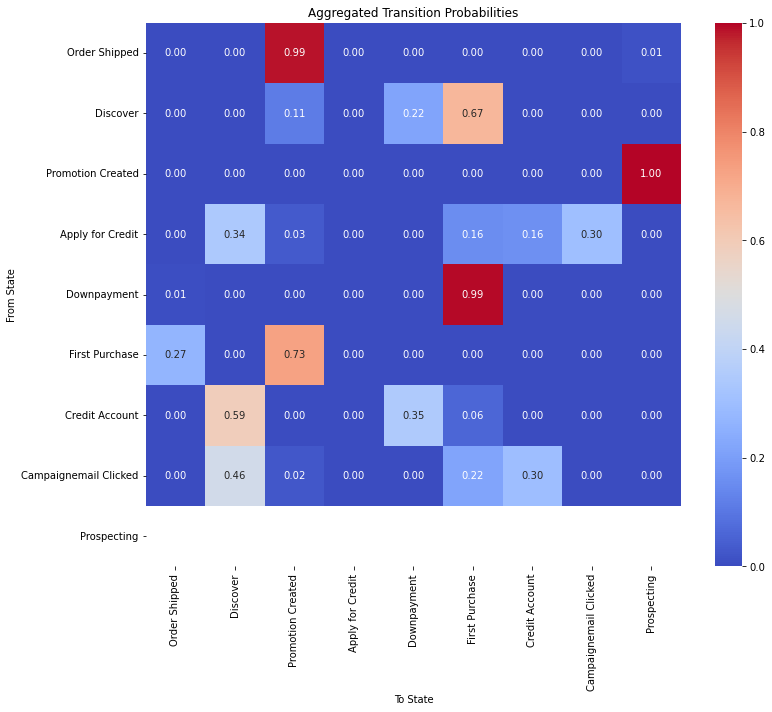

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(aggregated_probs, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=unique_states, yticklabels=unique_states)
plt.title("Aggregated Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

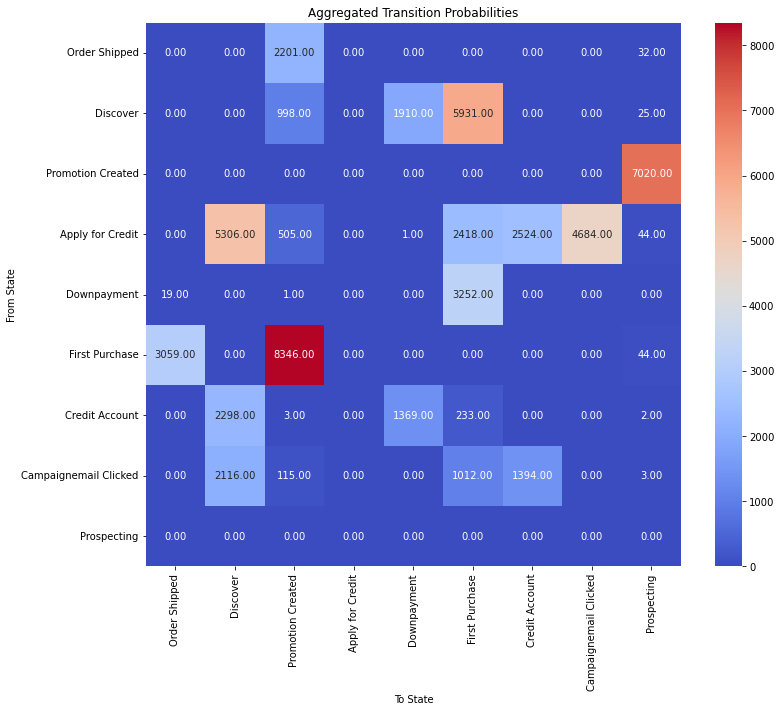

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(aggregated_counts, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=unique_states, yticklabels=unique_states)
plt.title("Aggregated Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

In [ ]:
import pydtmc

In [ ]:
import pandas as pd
smaller_sample = pd.read_csv('smaller_sample.csv')
smaller_sample.sort_values(by=['customer_id', 'event_timestamp'], inplace=True)
unique_events = smaller_sample['event_name'].unique()
n_events = len(unique_events)

In [ ]:
event_name_to_index = {event_name: index for index, event_name in enumerate(unique_events)}

In [ ]:
import numpy as np

transition_counts = np.zeros((n_events, n_events))

In [ ]:
for _, group in smaller_sample.groupby('customer_id'):
    events = group['event_name'].apply(lambda x: event_name_to_index[x]).values
    for i in range(len(events) - 1):
        current_event, next_event = events[i], events[i + 1]
        transition_counts[current_event, next_event] += 1

In [ ]:
transition_probs = transition_counts / transition_counts.sum(axis=1, keepdims=True)

In [ ]:
transition_probs[np.isnan(transition_probs)] = 0
np.fill_diagonal(transition_probs, 0) 

In [ ]:
transition_df = pd.DataFrame(transition_probs, index=unique_events, columns=unique_events)

In [ ]:
column_sums = transition_df.sum(axis=0)
zero_columns = column_sums == 0

# For columns that sum to 0, assign uniform probabilities
for col in transition_df.columns[zero_columns]:
    transition_df[col] = 1 / len(transition_df.columns)

transition_df = transition_df.div(transition_df.sum(axis=0), axis=1)

In [ ]:
column_sums = transition_df.sum(axis=0)
print(column_sums)

application_web_approved                  1.0
browse_products                           1.0
campaignemail_clicked                     1.0
promotion_created                         1.0
catalog_(mail)                            1.0
begin_checkout                            1.0
add_to_cart                               1.0
view_cart                                 1.0
application_web_view                      1.0
application_web_submit                    1.0
campaign_click                            1.0
account_activitation                      1.0
place_order_web                           1.0
place_downpayment                         1.0
account_downpaymentcleared                1.0
order_shipped                             1.0
site_registration                         1.0
application_phone_approved                1.0
place_order_phone                         1.0
pre-application_(3rd_party_affiliates)    1.0
application_web_declined                  1.0
account_downpaymentreceived       

In [ ]:
names = transition_df.index.tolist()
print(names)

['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'order_shipped', 'site_registration', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']


In [ ]:
mc = pydtmc.MarkovChain(np.transpose(transition_df), names)

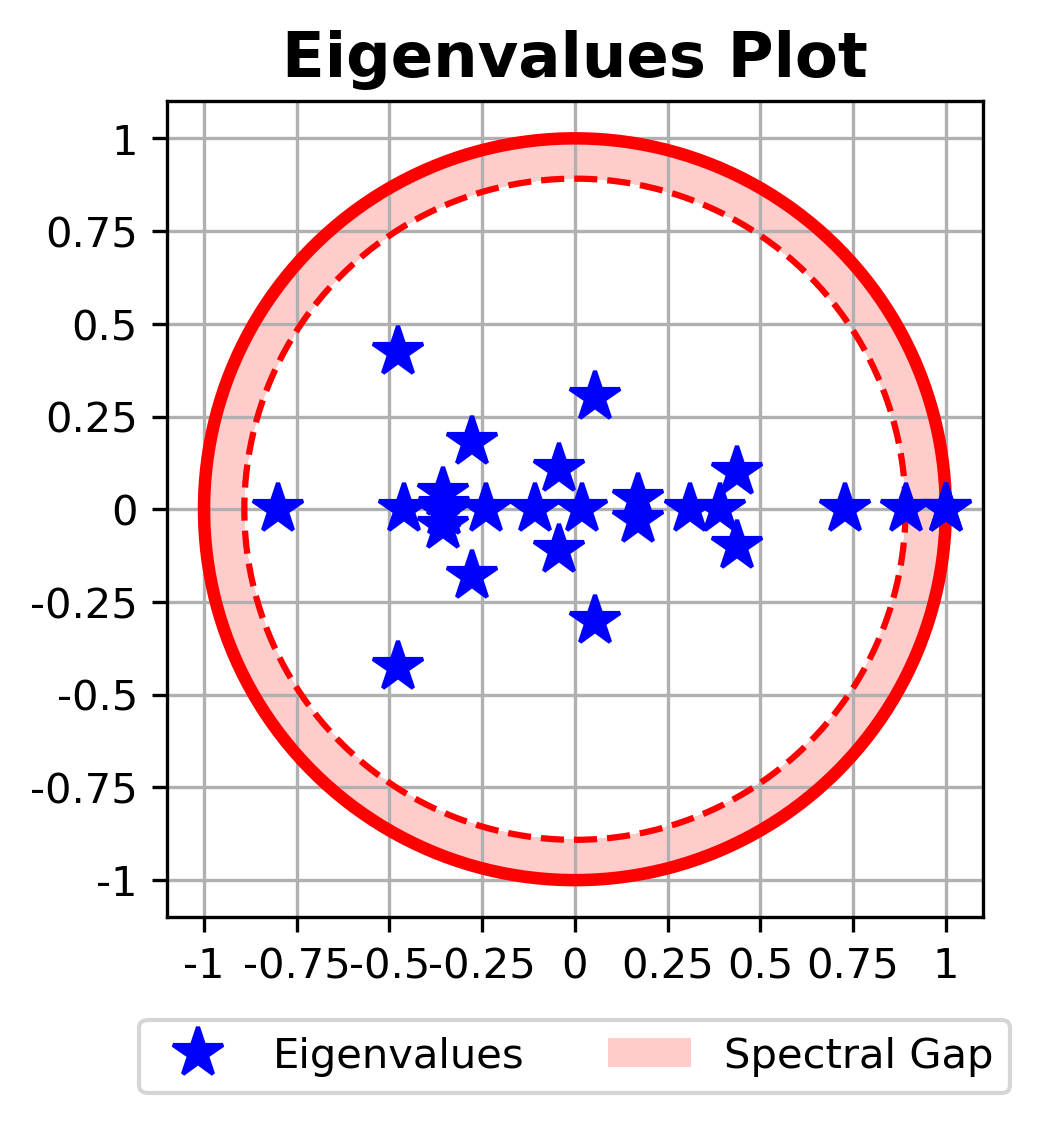

In [ ]:
pydtmc.plot_eigenvalues(mc, dpi=300)

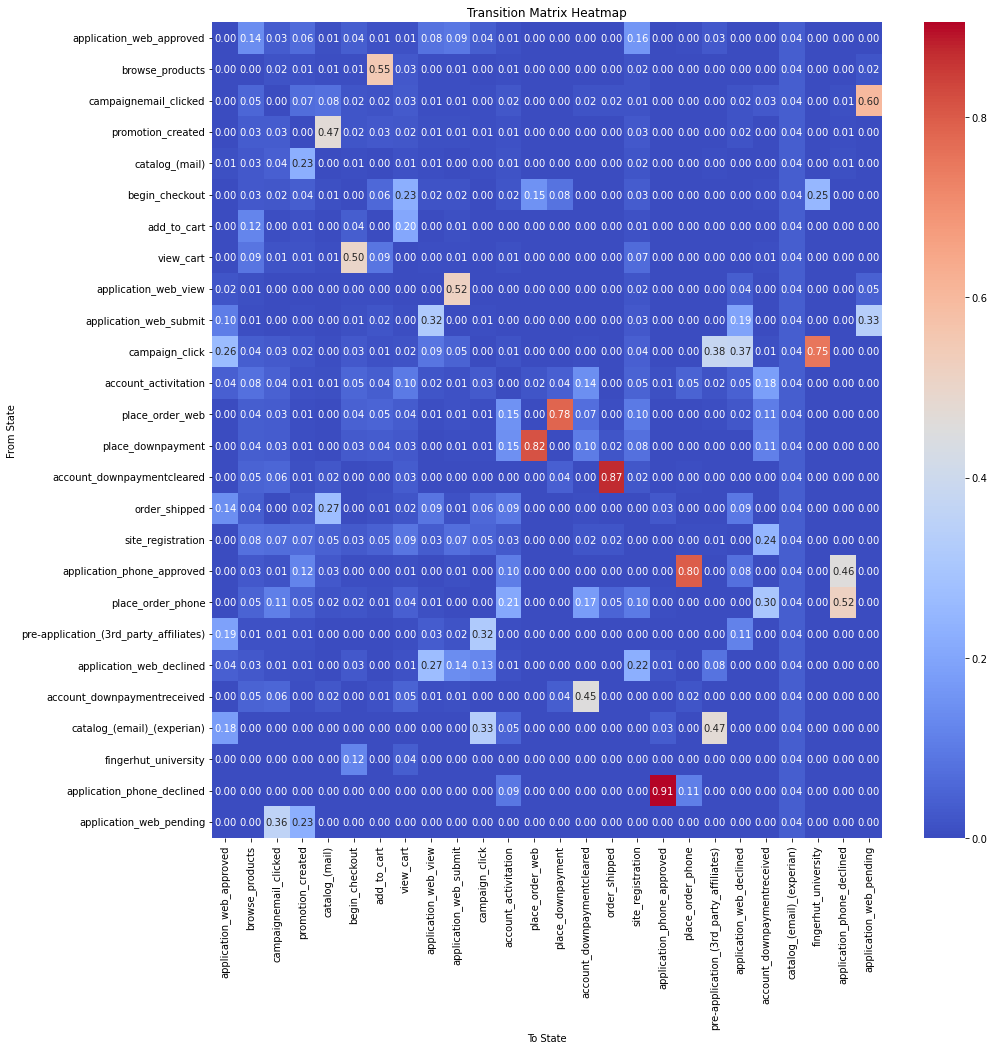

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(transition_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Transition Matrix Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

## Modeling

### Logistic Regression - Promotions

In [ ]:
# read in fingerhut_combined_grouped.pkl

fingerhut_combined_grouped = pd.read_pickle('../Dataset/fingerhut_combined_grouped.pkl')

In [ ]:
# if either the place_order_web or place_order_phone is 1, then make new column place_order = 1, else 0

fingerhut_combined_grouped['place_order'] = np.where((fingerhut_combined_grouped['place_order_web'] == 1) | (fingerhut_combined_grouped['place_order_phone'] == 1), 1, 0)

In [ ]:
# randomly sample 100000 rows from fingerhut_combined_grouped

# fingerhut_combined_grouped_sample = fingerhut_combined_grouped.sample(n=100000, random_state=0)

fingerhut_combined_grouped_sample = fingerhut_combined_grouped

In [ ]:
# check how many rows have activation = 1

fingerhut_combined_grouped_sample['activation'].value_counts()

0    1254569
1     410862
Name: activation, dtype: int64

In [ ]:
# check how many rows have place_order = 1 and activation = 1

ordered_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 1)]
print(len(ordered_activated))

354404


In [ ]:
# check how many rows have place_order = 0 and activation = 0

no_ordered_no_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 0) & (fingerhut_combined_grouped_sample['activation'] == 0)]
print(len(no_ordered_no_activated))

1229136


In [ ]:
# check how many rows have place_order = 1 and activation = 0

ordered_no_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 0)]
print(len(ordered_no_activated))

25433


In [ ]:
# check how many rows have place_order = 0 and activation = 1

no_ordered_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 0) & (fingerhut_combined_grouped_sample['activation'] == 1)]
print(len(no_ordered_activated))

56458


In [ ]:
# sum of all the above 4 categories should be 100000

len(ordered_activated) + len(no_ordered_no_activated) + len(ordered_no_activated) + len(no_ordered_activated)

1665431

In [ ]:
# check how many rows have promotion_exposure = 1

fingerhut_combined_grouped_sample['promotion_exposure'].value_counts()[1]

1523909

In [ ]:
# check how many rows have promotion_expousre = 1 and activation = 1

promotion_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['promotion_exposure'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 1)]
print(len(promotion_activated))

372432


In [ ]:
# check how many rows have promotion_expousre = 1 and activation = 0

promotion_no_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['promotion_exposure'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 0)]
print(len(promotion_no_activated))

1151477


In [ ]:
promotion_ids = [2, 9, 20, 21, 1, 24]

In [ ]:
# for each row, if the list object in the ed_id column contains any of the above 6 ids, then make a new column `promotion_type` that contains the list of ids that were found in the ed_id column

fingerhut_combined_grouped_sample['promotion_type'] = fingerhut_combined_grouped_sample['ed_id'].apply(lambda x: list(set(x).intersection(promotion_ids)))

In [ ]:
# if any of the columns 2, 9, 20, 21, 1, 24 are 1, then make a new column `promotion_y_n` = 1, else 0

fingerhut_combined_grouped_sample['promotion_y_n'] = np.where((fingerhut_combined_grouped_sample[2] == 1) | (fingerhut_combined_grouped_sample[9] == 1) | (fingerhut_combined_grouped_sample[20] == 1) | (fingerhut_combined_grouped_sample[21] == 1) | (fingerhut_combined_grouped_sample[1] == 1) | (fingerhut_combined_grouped_sample[24] == 1), 1, 0)

In [ ]:
fingerhut_combined_grouped_sample[[2, 9, 20, 21, 1, 24, 'promotion_y_n']]

,2,9,20,21,1,24,promotion_y_n
0,1,0,0,0,1,0,1
1,1,0,0,0,1,0,1
2,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
1665426,0,0,0,1,1,1,1
1665427,0,0,0,1,1,1,1
1665428,0,0,0,0,1,1,1
1665429,1,0,0,1,1,0,1


#### Classification

In [ ]:
# Using the activation column as the target variable, create a train-test split with 80% of the data in the training set and 20% in the test set.

from sklearn.model_selection import train_test_split

# X = fingerhut_combined_grouped_sample.drop('activation', axis=1)
# drop the columns that are not needed

X = fingerhut_combined_grouped_sample[[2, 9, 20, 21, 1, 24, 'promotion_y_n']]
X.columns = X.columns.astype(str)
y = fingerhut_combined_grouped_sample['activation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Using the training set, train a logistic regression model to predict the activation column. Use the following hyperparameters: max_iter=1000, random_state=0.

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [ ]:
# Get the coefficients from the logistic regression model

logreg.coef_

# Pair feature names with coefficients

feature_names = X_train.columns
feature_names

feature_coefficients = dict(zip(feature_names, logreg.coef_[0]))

feature_coefficients

# Sort features by value of coefficient, in descending order

sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)

sorted_features

# exponentiate the coefficients to get the odds ratio

odds_ratio = {k: np.exp(v) for k, v in feature_coefficients.items()}
odds_ratio

# order the odds ratio in descending order

sorted_odds_ratio = sorted(odds_ratio.items(), key=lambda x: x[1], reverse=True)
sorted_odds_ratio

[('24', 1.9362437597918083),
 ('1', 1.3759807339338685),
 ('promotion_y_n', 1.0385538769299125),
 ('9', 1.0),
 ('2', 0.8666245905305389),
 ('20', 0.6753108838183463),
 ('21', 0.2442945409238924)]

In [ ]:
# Using the test set, predict the activation column and calculate the accuracy of the model.

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.5655459384485134

In [ ]:
# Using the test set, calculate the confusion matrix and classification report of the model.

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.50      0.64    250911
           1       0.33      0.75      0.46     82176

    accuracy                           0.57    333087
   macro avg       0.60      0.63      0.55    333087
weighted avg       0.73      0.57      0.59    333087



In [ ]:
# try cross-validation in case the model is overfitting

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

cv_scores

# find mean of the cross-validation scores

np.mean(cv_scores)

0.566044467548961

#### Time to purchase

In [ ]:
# keep only the rows where application = 1, activation = 1, place_order = 1

fingerhut_combined_grouped_sample_activated_ordered = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['application'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 1) & (fingerhut_combined_grouped_sample['place_order'] == 1)]

In [ ]:
apply_for_credit_ids = [3, 12, 13, 14, 15, 16, 17, 19]
account_activation_ids = [29]
place_order_ids = [7, 18]

In [ ]:
# ed_id is a column containing lists of ids for each row. event_timestamp is a column containing lists of the same length as ed_id.
# For each row, extract the timestamp from the event_timestamp column that corresponds to the id in the ed_id column that matches the apply_for_credit_ids, account_activation_ids, and place_order_ids lists and store each timestamp in a new column respectively.

# fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][x['ed_id'].index(3)] if 3 in x['ed_id'] else None, axis=1)
fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][next((i for i, id in enumerate(x['ed_id']) if id in apply_for_credit_ids), None)] if any(id in x['ed_id'] for id in apply_for_credit_ids) else None, axis=1)
fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][x['ed_id'].index(29)] if 29 in x['ed_id'] else None, axis=1)
# fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][x['ed_id'].index(7)] if 7 in x['ed_id'] else None, axis=1)
fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][next((i for i, id in enumerate(x['ed_id']) if id in place_order_ids), None)] if any(id in x['ed_id'] for id in place_order_ids) else None, axis=1)

# Using the timestamps from the previous step, calculate the time it took for each customer to go from applying for credit to activating their account, and from activating their account to placing an order.

fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = pd.to_datetime(fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'])
fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'] = pd.to_datetime(fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'])
fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] = pd.to_datetime(fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'])

fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_to_activation'] = (fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'] - fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp']).dt.days
fingerhut_combined_grouped_sample_activated_ordered['activation_to_place_order'] = (fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] - fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp']).dt.days


/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_45608/2113970015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][next((i for i, id in enumerate(x['ed_id']) if id in apply_for_credit_ids), None)] if any(id in x['ed_id'] for id in apply_for_credit_ids) else None, axis=1)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_45608/2113970015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
fingerhut_combined_grouped_sample_activated_ordered

,combined_id,ed_id,stage,event_timestamp,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped,...,21,1,24,promotion_y_n,promotion_customer,apply_for_credit_timestamp,account_activation_timestamp,place_order_timestamp,apply_for_credit_to_activation,activation_to_place_order
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...","[2021-09-03T06:00:00.000Z, 2021-09-03T21:46:20...",1,1,1,1,0,1,...,0,1,0,1,1,2021-09-03 21:46:20+00:00,2021-09-12 00:00:00+00:00,2021-09-11 17:07:12+00:00,8,-1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...","[2021-02-20T06:00:00.000Z, 2021-02-20T22:23:39...",1,1,1,1,0,1,...,0,1,0,1,1,2021-02-20 23:10:24+00:00,2021-02-22 00:00:00+00:00,2021-02-22 14:41:23+00:00,1,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...","[2021-11-20T14:49:13.000Z, 2021-11-20T14:52:13...",1,1,1,1,0,1,...,0,1,0,1,1,2021-11-20 14:49:13+00:00,2021-12-12 00:00:00+00:00,2021-12-12 10:50:50+00:00,21,0
6,6,"[12, 4, 4, 4, 4, 4, 11, 5, 6, 8, 7, 29, 4, 4, ...","[Apply for Credit, First Purchase, First Purch...","[2021-01-19T06:25:55.000Z, 2021-01-19T06:33:59...",1,1,1,1,0,1,...,0,1,0,1,1,2021-01-19 06:25:55+00:00,2021-01-20 00:00:00+00:00,2021-01-19 22:37:21+00:00,0,-1
13,13,"[2, 12, 1, 29, 6, 4, 11, 5, 19, 5, 4, 8, 6, 7,...","[Discover, Apply for Credit, Promotion Created...","[2023-05-15T04:09:11.000Z, 2023-05-15T22:09:11...",1,1,1,1,0,1,...,0,1,0,1,1,2023-05-15 22:09:11+00:00,2023-05-16 00:00:00+00:00,2023-05-20 18:55:14+00:00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665405,1665405,"[15, 18, 18, 29, 27, 28, 15, 18, 1, 1]","[Apply for Credit, First Purchase, First Purch...","[2021-05-30T15:37:29.000Z, 2021-05-30T15:39:25...",1,1,1,0,1,1,...,0,1,0,1,1,2021-05-30 15:37:29+00:00,2021-06-01 00:00:00+00:00,2021-05-30 15:39:25.910000+00:00,1,-2
1665408,1665408,"[29, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[Credit Account, Apply for Credit, Apply for C...","[2021-10-07T00:00:00.000Z, 2021-10-07T03:59:04...",1,1,1,1,0,0,...,0,1,1,1,1,2021-10-07 03:59:04+00:00,2021-10-07 00:00:00+00:00,2022-10-21 04:13:09+00:00,-1,379
1665415,1665415,"[19, 19, 19, 19, 19, 19, 19, 3, 12, 4, 4, 4, 4...","[Apply for Credit, Apply for Credit, Apply for...","[2021-10-29T11:17:15.000Z, 2021-10-29T11:17:17...",1,1,1,1,0,1,...,0,1,1,1,1,2021-10-29 11:17:15+00:00,2021-11-09 00:00:00+00:00,2021-11-09 12:07:11+00:00,10,0
1665418,1665418,"[12, 2, 4, 11, 4, 1, 1, 4, 4, 4, 4, 11, 11, 11...","[Apply for Credit, Discover, First Purchase, F...","[2021-05-13T00:34:05.000Z, 2021-05-13T06:00:00...",1,1,1,1,0,0,...,1,1,0,1,1,2021-05-13 00:34:05+00:00,2021-06-08 00:00:00+00:00,2021-06-08 16:35:44+00:00,25,0


In [ ]:
# extract apply_for_credit_to_activation and activation_to_place_order columns and save them to a new dataframe

fingerhut_combined_grouped_sample_activated_ordered_time = fingerhut_combined_grouped_sample_activated_ordered[['apply_for_credit_to_activation', 'activation_to_place_order']]

In [ ]:
fingerhut_combined_grouped_sample_activated_ordered_time

,apply_for_credit_to_activation,activation_to_place_order
0,8,-1
1,1,0
4,21,0
6,0,-1
13,0,4
...,...,...
1665405,1,-2
1665408,-1,379
1665415,10,0
1665418,25,0


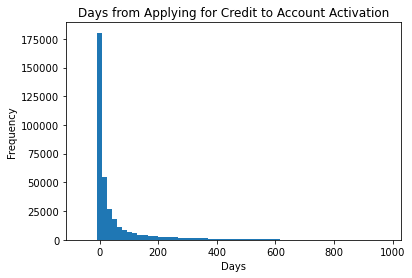

In [ ]:
# plot both columns as histograms

import matplotlib.pyplot as plt

fingerhut_combined_grouped_sample_activated_ordered_time['apply_for_credit_to_activation'].plot(kind='hist', bins=60)
# add title and axis labels

plt.title('Days from Applying for Credit to Account Activation')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

# fingerhut_combined_grouped_sample_activated_ordered_time['activation_to_place_order'].plot(kind='hist', bins=60)

# plt.show()

In [ ]:
# append promotion_y_n from fingerhut_combined_grouped_sample to fingerhut_combined_grouped_sample_activated_ordered

fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] = fingerhut_combined_grouped_sample_activated_ordered['promotion_y_n']

fingerhut_combined_grouped_sample_activated_ordered_time

/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_45608/2234296860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] = fingerhut_combined_grouped_sample_activated_ordered['promotion_y_n']


,apply_for_credit_to_activation,activation_to_place_order,promotion_y_n
0,8,-1,1
1,1,0,1
4,21,0,1
6,0,-1,1
13,0,4,1
...,...,...,...
1665405,1,-2,1
1665408,-1,379,1
1665415,10,0,1
1665418,25,0,1


In [ ]:
# remove outliers from apply_for_credit_to_activation column

fingerhut_combined_grouped_sample_activated_ordered_time = fingerhut_combined_grouped_sample_activated_ordered_time[fingerhut_combined_grouped_sample_activated_ordered_time['apply_for_credit_to_activation'] < 600]


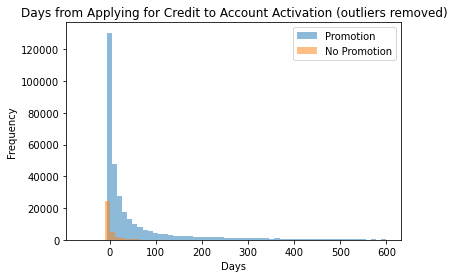

In [ ]:
# make two histograms for apply_for_credit_to_activation based on whether promotion_y_n is 1 or 0

fingerhut_combined_grouped_sample_activated_ordered_time[fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] == 1]['apply_for_credit_to_activation'].plot(kind='hist', bins=60, alpha=0.5, label='Promotion')
fingerhut_combined_grouped_sample_activated_ordered_time[fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] == 0]['apply_for_credit_to_activation'].plot(kind='hist', bins=60, alpha=0.5, label='No Promotion')

plt.title('Days from Applying for Credit to Account Activation (outliers removed)')

plt.xlabel('Days')

plt.ylabel('Frequency')

plt.legend()

plt.show()

#### Numbers

In [ ]:
# find the percentage of people who have either place_order_phone or place_order_web == 1

fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order_phone'] == 1) | (fingerhut_combined_grouped_sample['place_order_web'] == 1)].shape[0] / fingerhut_combined_grouped_sample.shape[0]

0.22807129205593027

In [ ]:
promotion_ids = [2, 9, 20, 21, 1, 24]

In [ ]:
type(fingerhut_combined_grouped_sample['ed_id'])

pandas.core.series.Series

In [ ]:
promotion_customers = []

for id_list in fingerhut_combined_grouped_sample['ed_id']:
    # if any value in id_list is in promotion_ids, store the index of the row in promotion_customers
    if any(x in id_list for x in promotion_ids):
        promotion_customers.append(True)
    else:
        promotion_customers.append(False)
        

In [ ]:
fingerhut_combined_grouped_sample['promotion_customer'] = promotion_customers

# convert promotion_customer to int

fingerhut_combined_grouped_sample['promotion_customer'] = fingerhut_combined_grouped_sample['promotion_customer'].astype(int)

In [ ]:
# of those who have promotion_customer == 1, find the percentage of people who have either place_order_phone or place_order_web == 1

fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['promotion_customer'] == 1) & ((fingerhut_combined_grouped_sample['place_order_phone'] == 1) | (fingerhut_combined_grouped_sample['place_order_web'] == 1))].shape[0] / fingerhut_combined_grouped_sample[fingerhut_combined_grouped_sample['promotion_customer'] == 1].shape[0]

0.22422008138281224

## Classification - Successful Journeys

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [ ]:
print(df.shape)
df.head()

(1728485, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1


In [ ]:
df.columns

Index(['customer_id', 'account_id', 'ed_id', 'event_name', 'event_timestamp',
       'journey_steps_until_end', 'stage', 'account_activation',
       'place_order'],
      dtype='object')

In [ ]:
df.dtypes

customer_id                 int64
account_id                  int64
ed_id                      object
event_name                 object
event_timestamp            object
journey_steps_until_end    object
stage                      object
account_activation          int64
place_order                 int64
dtype: object

## Examining first/last events

In [ ]:
first_events = df['event_name'].apply(lambda x: x[0] if x else None)
last_events = df['event_name'].apply(lambda x: x[-1] if x else None)

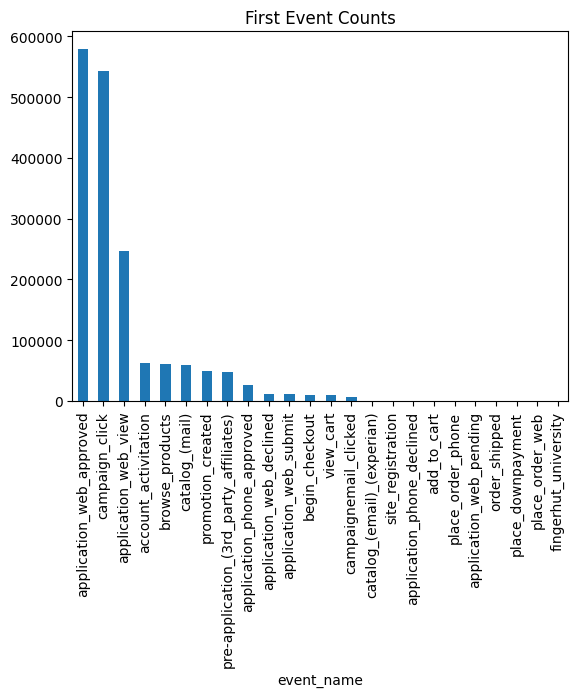

In [ ]:
first_events.value_counts().plot(kind = 'bar')
plt.title("First Event Counts")
plt.show()

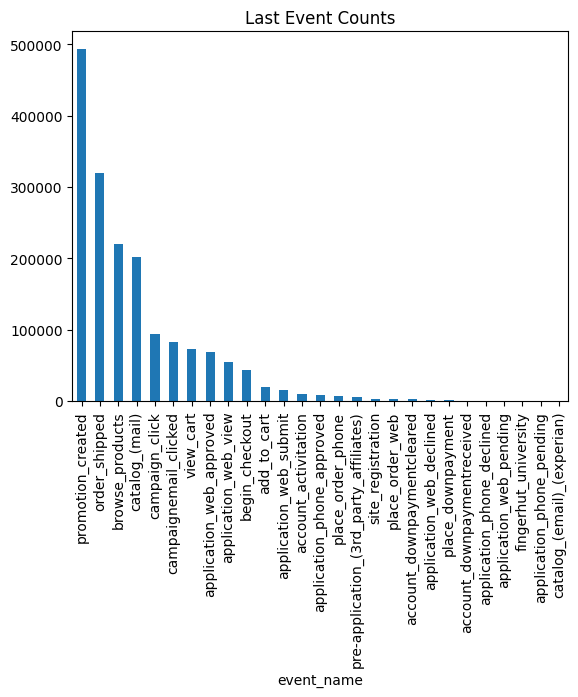

In [ ]:
last_events.value_counts().plot(kind = 'bar')
plt.title("Last Event Counts")
plt.show()

In [ ]:
df_with_orders = df[df['event_name'].apply(lambda x: 'order_shipped' in x)]

In [ ]:
print(df_with_orders.shape)
df_with_orders.head()

(321160, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
13,-2147452610,-1905163177,"[12, 1, 29, 3, 4, 11, 19, 5, 6, 7, 5, 8, 6, 8,...","[application_web_approved, promotion_created, ...","[2023-07-25 19:46:36+00:00, 2023-07-25 20:32:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Promotion Created, Credit A...",1,1
27,-2147425125,221594945,"[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 19,...","[campaign_click, application_web_view, applica...","[2021-09-25 06:00:00+00:00, 2021-09-25 19:59:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
34,-2147395611,674764100,"[29, 2, 12, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 5,...","[account_activitation, campaign_click, applica...","[2021-06-15 00:00:00+00:00, 2021-06-15 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Credit Account, Discover, Apply for Credit, F...",1,1


In [ ]:
df_no_orders = df[df['event_name'].apply(lambda x: 'order_shipped' not in x)]

In [ ]:
print(df_no_orders.shape)
df_no_orders.head()

(1407325, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
5,-2147466542,-823743386,"[12, 1, 4, 11, 5, 1, 1, 21, 1, 21, 21, 1]","[application_web_approved, promotion_created, ...","[2021-12-25 22:00:57+00:00, 2021-12-25 22:01:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Apply for Credit, Promotion Created, First Pu...",0,0
6,-2147466262,-296951572,"[2, 13, 19, 19, 12, 1, 4, 5, 19, 6, 3, 11, 2, 4]","[campaign_click, application_web_declined, app...","[2023-04-10 02:34:58+00:00, 2023-04-10 20:34:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Discover, Apply for Credit, Apply for Credit,...",0,0


### Feature Engineering

In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
def_df['stage_int'] = def_df['stage'].map(stage_dict)

In [ ]:
stage_mapping_dict = def_df.set_index('event_definition_id')['stage_int'].to_dict()

In [ ]:
sampled_df = df.sample(n=500000, replace=False)

In [ ]:
df.head(3)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1


In [ ]:
cutoff_date = pd.to_datetime('2023-09-20 12:29:58+0000', utc=True)
cutoff_date # this is like "today"

Timestamp('2023-09-20 12:29:58+0000', tz='UTC')

In [ ]:
required_stages = {'Apply for Credit', 'First Purchase', 'Downpayment', 'Order Shipped'}
promotion_ids = [2, 9, 20, 21, 1, 24]


# Function to get the stage from the first id in the list
def get_stage_from_first_id(id_list):
    # Get the first id
    first_id = id_list[0]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(first_id, 0)

def get_stage_from_last_id(id_list):
    # Get the first id
    last_id = id_list[-1]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(last_id, 0)

def clean_df(df):
    df = df.reset_index(drop = True)

    # df['event_count'] = df['event_name'].apply(len)
    # df['num_accounts'] = df['account_id'].apply(len)
    # df['unique_event_count'] = df['event_name'].apply(lambda x: len(set(x)))
    # df['unique_stage_count'] = df['stage'].apply(lambda x: len(set(x)))
    
    df['first_event'] = df['ed_id'].apply(lambda x: x[0] if x else None)
    df['days_since_start'] = df['event_timestamp'].apply(lambda x: (cutoff_date - x[0]).days)
    # df['last_event'] = df['ed_id'].apply(lambda x: x[-1] if x else None)
    # df['len_journey'] = df['journey_steps_until_end'].apply(len)
    # df['days_in_journey'] = df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
    # df['progression_rate'] = df['len_journey'] / df['days_in_journey'] # estimate for progression rate of journey
    df['first_stage'] = df['ed_id'].apply(get_stage_from_first_id)
    # df['last_stage'] = df['ed_id'].apply(get_stage_from_last_id)

    df['first_event_month'] = df['event_timestamp'].apply(lambda x: x[0].month)
    df['first_event_day'] = df['event_timestamp'].apply(lambda x: x[0].day)
    df['first_event_hour'] = df['event_timestamp'].apply(lambda x: x[0].hour)

    # now create columns for whether a specific event is present or not
    # remember that ideal journey is defined as: Apply for credit > Make a first purchase > Make the down payment > Order Ships
    # df already has account activation and place order one hot encoded columns
    # df['apply_for_credit'] = df['stage'].apply(lambda x: 1 if 'Apply for Credit' in x else 0) # Apply for credit
    # df['make_first_purchase'] = df['stage'].apply(lambda x: 1 if 'First Purchase' in x else 0) # first purchase
    # df['downpayment'] = df['stage'].apply(lambda x: 1 if 'Downpayment' in x else 0) # downpayment
    # df['order_shipped'] = df['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0) # order shipped

    df['ideal_journey'] = df['stage'].apply(lambda x: 1 if required_stages.issubset(set(x)) else 0)
    df['promotion_exposure'] = df['ed_id'].apply(lambda x: 1 if any([i in x for i in promotion_ids]) else 0)


    df = df.drop(['event_name', 'event_timestamp', 'ed_id', 'journey_steps_until_end', 'stage', 'place_order', 'account_activation'], axis = 1)
    
    
    return df

In [ ]:
sampled_df = clean_df(sampled_df)
whole_sampled_df = clean_df(df)

In [ ]:
sampled_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_clustering_sample_df.pkl")

In [ ]:
whole_sampled_df.isna().any() # check for NA values

customer_id           False
account_id            False
first_event           False
days_since_start      False
first_stage           False
first_event_month     False
first_event_day       False
first_event_hour      False
ideal_journey         False
promotion_exposure    False
dtype: bool

In [ ]:
whole_sampled_df

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1728480,2147480051,-148210516,21,1006,7,12,18,0,0,1
1728481,2147480182,-1286764612,12,90,1,6,22,9,0,1
1728482,2147480920,496493954,2,487,3,5,21,6,0,1
1728483,2147482120,-488077144,12,51,1,7,30,15,0,1


In [ ]:
whole_sampled_df.to_pickle(("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl"))

In [ ]:
model_df = whole_sampled_df.drop(['customer_id', 'account_id'], axis = 1)
model_df.head()

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,12,715,1,10,5,8,0,1
1,12,25,1,8,26,12,0,1
2,2,159,3,4,14,1,1,1
3,6,660,5,11,28,22,0,1
4,12,213,1,2,19,8,1,1


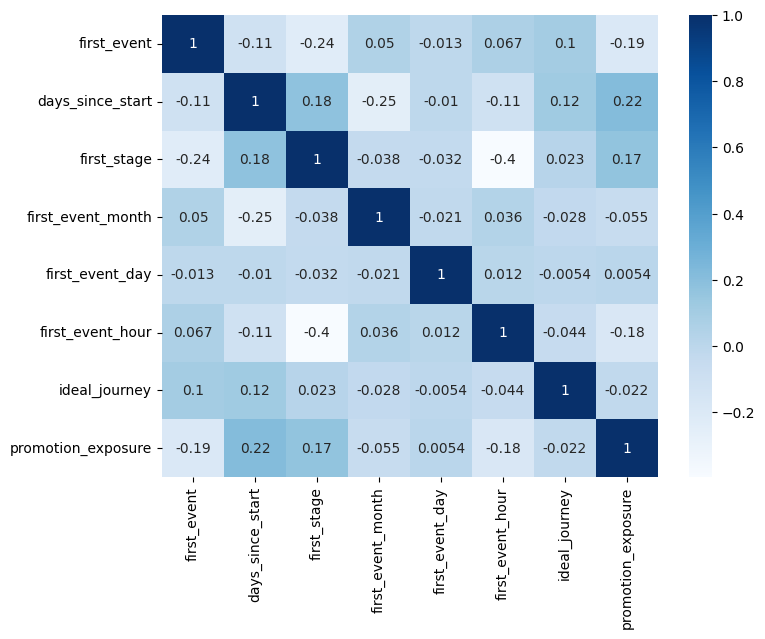

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(model_df.corr(), cmap='Blues', annot = True)
plt.show()

In [ ]:
X = model_df.drop(['ideal_journey'], axis = 1)
y = whole_sampled_df['ideal_journey'] # we use ideal_journey rather than order_shipped etc because the two variables have a correlation of 0.99

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
clf = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.8172355939067428
precision 0.8306801736613604
recall 0.0054820163123412225
f1 0.010892150630473354


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['unsuccessful', 'successful']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

unsuccessful       0.82      1.00      0.90    465695
  successful       0.83      0.01      0.01    104706

    accuracy                           0.82    570401
   macro avg       0.82      0.50      0.46    570401
weighted avg       0.82      0.82      0.74    570401



### Now try with balanced data

In [ ]:
clf = LogisticRegression(max_iter = 10000, class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

unsuccessful       0.86      0.57      0.68    465695
  successful       0.23      0.58      0.33    104706

    accuracy                           0.57    570401
   macro avg       0.55      0.58      0.51    570401
weighted avg       0.74      0.57      0.62    570401



In [ ]:
coefficients = clf.coef_[0]  
feature_importance = zip(X_train.columns, coefficients)
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

days_since_start: 0.36311535527275607
first_event: 0.254940458320009
promotion_exposure: -0.06274066279798429
first_event_hour: -0.056873856003187534
first_stage: 0.05520082028618418
first_event_month: 0.020378343977209792
first_event_day: -0.0026614784994115613


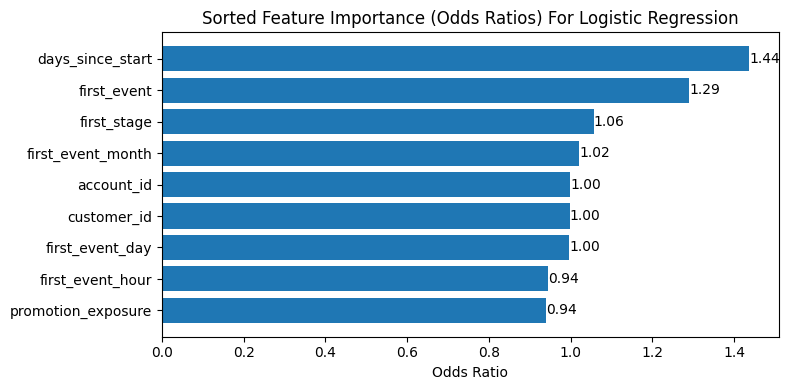

In [ ]:
odds_ratios = np.exp(coefficients)
odds_df = pd.DataFrame({'Feature': X_train.columns, 'OddsRatio': odds_ratios})
odds_df_sorted = odds_df.sort_values(by='OddsRatio', ascending=True)

plt.figure(figsize=(8, 4))
barplot = plt.barh(odds_df_sorted['Feature'], odds_df_sorted['OddsRatio'])
for bar in barplot:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{bar.get_width():.2f}", va='center')

plt.xlabel('Odds Ratio')
plt.title('Sorted Feature Importance (Odds Ratios) For Logistic Regression')
plt.tight_layout() 
plt.show()

## Try cross fold validation in case overfitting

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') # 10 fold cv
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')

Accuracy for each fold: [0.81761538 0.81758645 0.81758066 0.81760959 0.8177253  0.81753911
 0.81760275 0.81754489 0.81738869 0.81771267]
Mean accuracy: 0.8175905488536899


## Look into other models

first test on sample data

In [ ]:
temp = sampled_df.drop(['customer_id', 'account_id'], axis = 1)
temp.head()

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,19,452,1,6,25,1,0,1
1,12,299,1,11,25,8,0,1
2,12,77,1,7,4,17,0,0
3,4,291,5,12,2,14,0,1
4,2,902,3,4,1,6,0,1


In [ ]:
temp.shape

(500000, 8)

In [ ]:
X_sample = temp.drop(['ideal_journey'], axis = 1)
y_sample = temp['ideal_journey']

In [ ]:
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)
X_sample_scaled = pd.DataFrame(X_sample_scaled, columns=X_sample.columns)

In [ ]:
X_sample_scaled

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,promotion_exposure
0,1.111889,-0.384390,-0.720606,-0.091906,1.064658,-1.216239,0.314428
1,0.203463,-0.911855,-0.720606,1.380873,1.064658,-0.123493,0.314428
2,0.203463,-1.677196,-0.720606,0.202650,-1.368214,1.281467,-3.180380
3,-0.834739,-0.939435,1.934916,1.675429,-1.599916,0.813147,0.314428
4,-1.094289,1.166979,0.607155,-0.681018,-1.715767,-0.435706,0.314428
...,...,...,...,...,...,...,...
499995,1.501214,1.198006,0.607155,-0.975574,0.832956,-0.435706,0.314428
499996,1.501214,-0.125828,0.607155,-0.681018,-0.557256,-0.435706,0.314428
499997,-1.094289,-0.318887,0.607155,-0.091906,-1.136511,-0.435706,0.314428
499998,-1.094289,0.732596,0.607155,0.497206,-1.252363,-0.435706,0.314428


In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_sample_scaled, y_sample, test_size=0.33, random_state=42)

### Logistic Regression again to just get baseline for performance on sampled data

In [ ]:
clf = LogisticRegression(max_iter = 10000).fit(X_train0, y_train0)
y_pred = clf.predict(X_test0)
accuracy = accuracy_score(y_test0, y_pred)
precision = precision_score(y_test0, y_pred)
recall = recall_score(y_test0, y_pred)
f1 = f1_score(y_test0, y_pred)

In [ ]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.8173090909090909
precision 0.8188976377952756
recall 0.0034408602150537634
f1 0.006852925672113864


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=2, max_features='sqrt', n_jobs=-1, 
                                       random_state=42, class_weight = 'balanced')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print(classification_report(y_test, y_pred, target_names=target_names))

# setting class weight to balanced brough accuracy down from 82% to 64% but raised the other metrics significantly

accurary 0.6454757267255843
precision 0.2602864320866868
recall 0.5056252745783432
f1 0.3436620632576557
              precision    recall  f1-score   support

unsuccessful       0.86      0.68      0.76    465695
  successful       0.26      0.51      0.34    104706

    accuracy                           0.65    570401
   macro avg       0.56      0.59      0.55    570401
weighted avg       0.75      0.65      0.68    570401



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=1, max_features='sqrt', n_jobs=-1, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')

print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')


Accuracy for each fold: [0.81761538 0.81758645 0.81754595 0.81760959 0.8177253  0.81753911
 0.81757382 0.81753911 0.81738869 0.81771267]
Mean accuracy: 0.8175836063578046


In [ ]:
y.value_counts(normalize = True)

ideal_journey
0    0.816759
1    0.183241
Name: proportion, dtype: float64

In [ ]:
X_scaled.shape

(1728485, 7)

### Hyperparameter tuning for random forest classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_sample_rf, _, y_sample_rf, _ = train_test_split(X, y, stratify=y, train_size=0.2, random_state=42)  # Sample 20% of the data

rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight = 'balanced')
param_distributions = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20],
                       'min_samples_split': [2, 5],'min_samples_leaf': [1, 2], 'max_features': ['sqrt', 'log2']}

random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, scoring='roc_auc', cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_sample_rf, y_sample_rf)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best AUC-ROC score: {random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  38.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  39.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  56.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  58.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200

### Now use best parameters from grid search cv on full dataset

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'log2', max_depth = 10,
                                       random_state=42, class_weight = 'balanced', n_jobs = -1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print(classification_report(y_test, y_pred, target_names=target_names))

accurary 0.6480844178043166
precision 0.2720946680400431
recall 0.5474662388019789
f1 0.36351817971393147
              precision    recall  f1-score   support

unsuccessful       0.87      0.67      0.76    465695
  successful       0.27      0.55      0.36    104706

    accuracy                           0.65    570401
   macro avg       0.57      0.61      0.56    570401
weighted avg       0.76      0.65      0.68    570401



In [ ]:
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras import layers

# Perform oversampling to address class imbalance
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(7,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.6007 - loss: 0.6376 - val_accuracy: 0.6047 - val_loss: 0.6341
Epoch 2/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.6062 - loss: 0.6337 - val_accuracy: 0.6031 - val_loss: 0.6337
Epoch 3/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.6064 - loss: 0.6329 - val_accuracy: 0.6033 - val_loss: 0.6339
Epoch 4/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.6069 - loss: 0.6323 - val_accuracy: 0.6055 - val_loss: 0.6334
Epoch 5/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 108s 2ms/step - accuracy: 0.6069 - loss: 0.6326 - val_accuracy: 0.6038 - val_loss: 0.6338
Epoch 6/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.6070 - loss: 0.6325 - val_accuracy: 0.6052 - val_loss: 0.6326
Epoch 7/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.6073 - loss: 0.6322 - val_accuracy: 0.6045 - val_loss: 0.6332
Epoch 8/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - ac

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define your model as before
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model as before
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)

# Train the model with the callback
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr] 
)

Epoch 1/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step - accuracy: 0.6001 - loss: 0.6380 - val_accuracy: 0.6038 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 2/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.6055 - loss: 0.6339 - val_accuracy: 0.6051 - val_loss: 0.6339 - learning_rate: 0.0010
Epoch 3/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step - accuracy: 0.6066 - loss: 0.6331 - val_accuracy: 0.6042 - val_loss: 0.6344 - learning_rate: 0.0010
Epoch 4/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.6066 - loss: 0.6331 - val_accuracy: 0.6053 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 5/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 100s 1ms/step - accuracy: 0.6065 - loss: 0.6324 - val_accuracy: 0.6059 - val_loss: 0.6329 - learning_rate: 0.0010
Epoch 6/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 97s 1ms/step - accuracy: 0.6073 - loss: 0.6322 - val_accuracy: 0.6055 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 7/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step

# Classification Visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl")
print(df.shape)
df.head()

(1728485, 10)


,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1


In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")

In [ ]:
df.set_index(['customer_id', 'account_id'], inplace=True)

In [ ]:
df['ideal_journey'] = df['ideal_journey'].map({0: 'unsuccessful', 1: 'successful'})


In [ ]:
df['promotion_exposure'] = df['promotion_exposure'].map({0: 'no', 1: 'yes'})


In [ ]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
stage_dict = {v:k for k,v in stage_dict.items()}

df['first_stage'] = df['first_stage'].map(stage_dict)

In [ ]:
df.head()

,,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
customer_id,account_id,,,,,,,,
-2147483541,2059949086,12,715,Apply for Credit,10,5,8,unsuccessful,yes
-2147481037,-1245770865,12,25,Apply for Credit,8,26,12,unsuccessful,yes
-2147474335,-1929965268,2,159,Discover,4,14,1,successful,yes
-2147474305,1098145658,6,660,First Purchase,11,28,22,unsuccessful,yes
-2147472167,889210381,12,213,Apply for Credit,2,19,8,successful,yes


In [ ]:
df['ideal_journey'].value_counts(normalize = True)

ideal_journey
unsuccessful    0.816759
successful      0.183241
Name: proportion, dtype: float64

In [ ]:
df['promotion_exposure'].value_counts(normalize = True)

promotion_exposure
yes    0.910302
no     0.089698
Name: proportion, dtype: float64

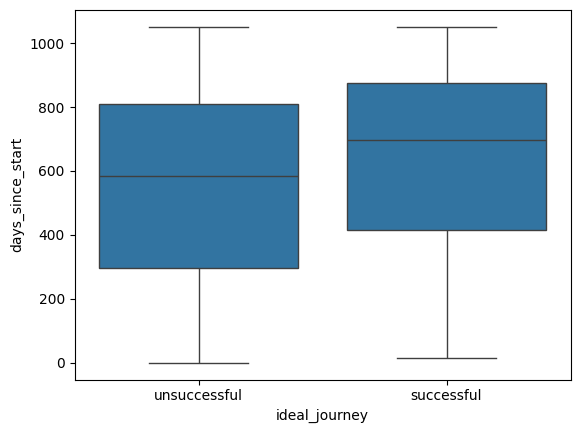

In [ ]:
sns.boxplot(data=df, x='ideal_journey', y='days_since_start')
plt.show()

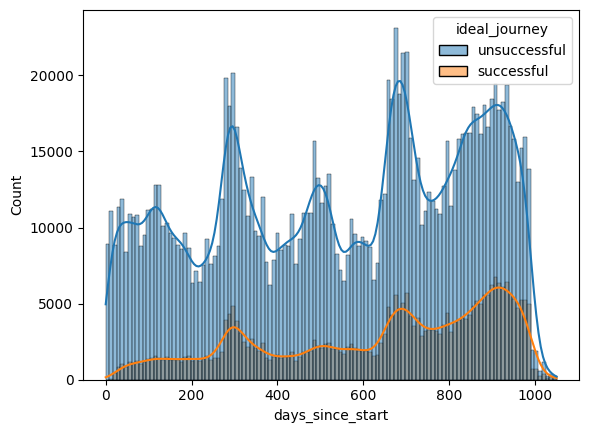

In [ ]:
sns.histplot(data=df, x='days_since_start', hue='ideal_journey', kde=True)
plt.show()

<Axes: xlabel='ideal_journey', ylabel='days_since_start'>

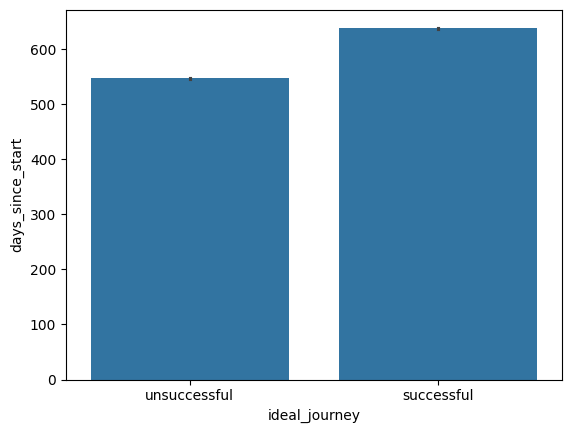

In [ ]:
sns.barplot(x = 'ideal_journey', y = 'days_since_start', data = df)

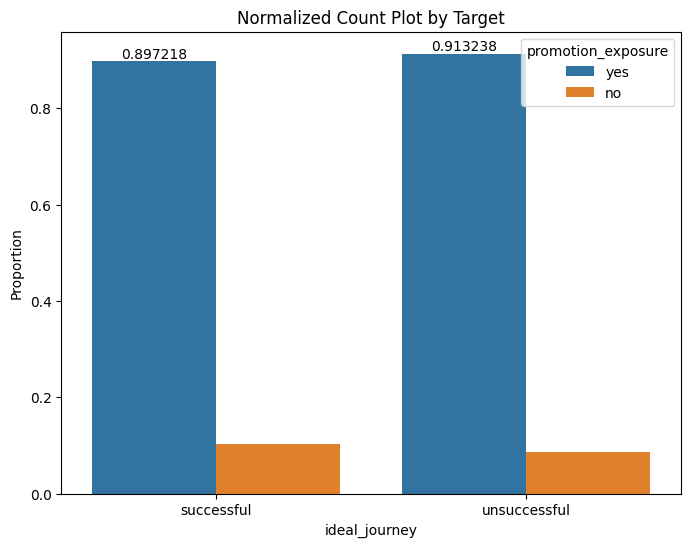

In [ ]:
proportions = df.groupby('ideal_journey')['promotion_exposure'].value_counts(normalize=True).rename('proportion').reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='ideal_journey', y='proportion', hue='promotion_exposure', data=proportions, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Normalized Count Plot by Target')
plt.ylabel('Proportion')
plt.show()


In [ ]:
df

,,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
customer_id,account_id,,,,,,,,
-2147483541,2059949086,12,715,Apply for Credit,10,5,8,unsuccessful,yes
-2147481037,-1245770865,12,25,Apply for Credit,8,26,12,unsuccessful,yes
-2147474335,-1929965268,2,159,Discover,4,14,1,successful,yes
-2147474305,1098145658,6,660,First Purchase,11,28,22,unsuccessful,yes
-2147472167,889210381,12,213,Apply for Credit,2,19,8,successful,yes
...,...,...,...,...,...,...,...,...,...
2147480051,-148210516,21,1006,Prospecting,12,18,0,unsuccessful,yes
2147480182,-1286764612,12,90,Apply for Credit,6,22,9,unsuccessful,yes
2147480920,496493954,2,487,Discover,5,21,6,unsuccessful,yes


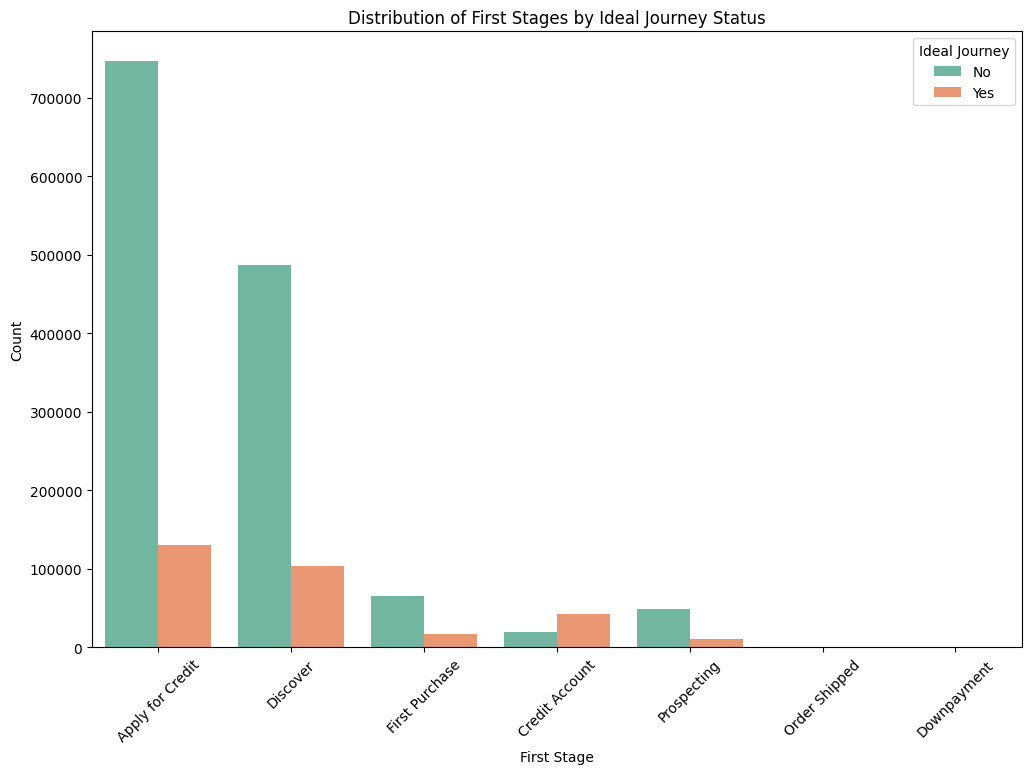

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='first_stage', hue='ideal_journey', data=df, palette='Set2')
plt.title('Distribution of First Stages by Ideal Journey Status')
plt.xlabel('First Stage')
plt.ylabel('Count')
plt.legend(title='Ideal Journey', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

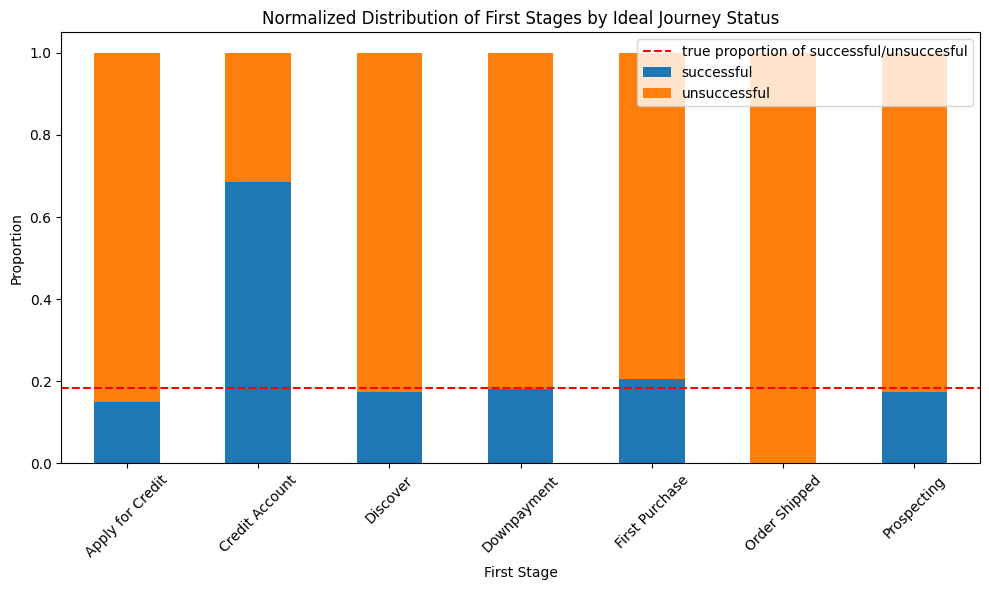

In [ ]:
proportions = df.groupby(['first_stage', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of First Stages by Ideal Journey Status')
plt.xlabel('First Stage')
plt.ylabel('Proportion')
plt.axhline(y=0.183241, color='red', linestyle='--', label = 'true prop of successful/unsuccesful')
plt.legend(loc='upper right')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
df_ideal = df[df['ideal_journey'] == 'successful']
df_nonideal = df[df['ideal_journey'] == 'unsuccessful']

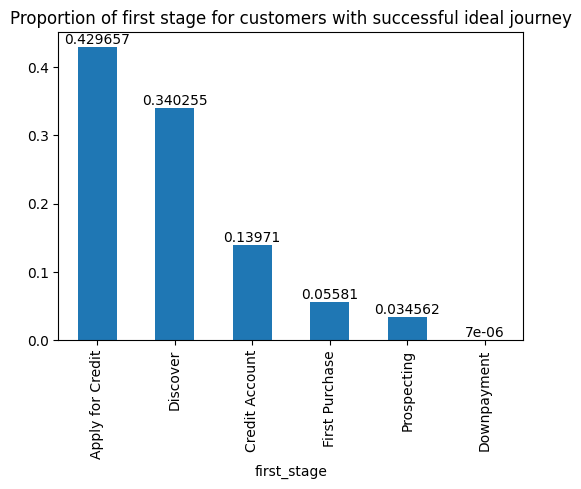

In [ ]:
plt.figure(figsize = (6, 4))
df_ideal['first_stage'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(df_ideal['first_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of first stage for customers with successful ideal journey")
plt.show()

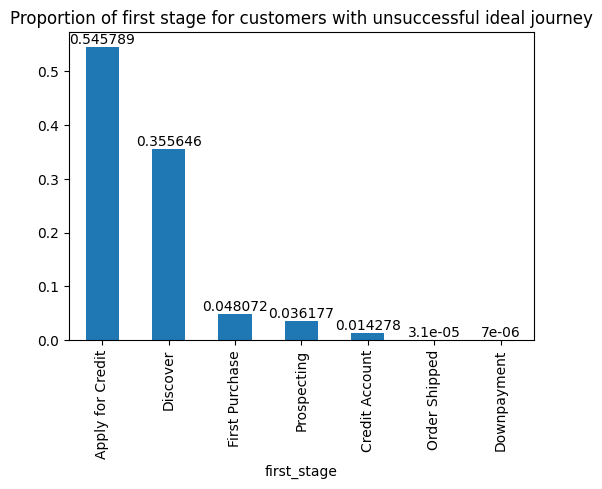

In [ ]:
plt.figure(figsize = (6, 4))
df_nonideal['first_stage'].value_counts(normalize=True).plot(kind='bar')

for i, v in enumerate(df_nonideal['first_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of first stage for customers with unsuccessful ideal journey")
plt.show()

## Now inspect wide format data

In [ ]:
wide_df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [ ]:
wide_df.set_index(['customer_id', 'account_id'], inplace=True)

In [ ]:
wide_df

,,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
customer_id,account_id,,,,,,,
-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
...,...,...,...,...,...,...,...,...
2147480051,-148210516,"[21, 22, 2, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]","[catalog_(mail), pre-application_(3rd_party_af...","[2020-12-18 00:00:00+00:00, 2021-01-23 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Prospecting, Discover, Discover, Apply for Cr...",0,0
2147480182,-1286764612,"[12, 2, 24, 4, 24, 24, 24, 24, 24]","[application_web_approved, campaign_click, cam...","[2023-06-22 09:44:49+00:00, 2023-06-22 15:44:4...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Apply for Credit, Discover, Campaignemail Cli...",0,0
2147480920,496493954,"[2, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, ...","[campaign_click, application_web_view, applica...","[2022-05-21 06:00:00+00:00, 2022-05-21 23:30:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",0,0


In [ ]:
# wide_df['ideal_journey'] = df['ideal_journey']
wide_df['ideal_journey'] = wide_df.index.map(df['ideal_journey'])

In [ ]:
wide_df['event_count'] = wide_df['event_name'].apply(len)
wide_df['unique_event_count'] = wide_df['event_name'].apply(lambda x: len(set(x)))
wide_df['unique_stage_count'] = wide_df['stage'].apply(lambda x: len(set(x)))
wide_df['last_event'] = wide_df['event_name'].apply(lambda x: x[-1] if x else None)
wide_df['last_stage'] = wide_df['stage'].apply(lambda x: x[-1] if x else None)
wide_df['len_journey'] = wide_df['journey_steps_until_end'].apply(len)
wide_df['days_in_journey'] = wide_df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
wide_df['progression_rate'] = wide_df['len_journey'] / wide_df['days_in_journey'] # estimate for progression rate of journey

In [ ]:
wide_df.head()

,,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order,ideal_journey,event_count,unique_event_count,unique_stage_count,last_event,last_stage,len_journey,days_in_journey,progression_rate
customer_id,account_id,,,,,,,,,,,,,,,,
-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0,unsuccessful,29,7,4,promotion_created,Promotion Created,29,238,0.121849
-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0,unsuccessful,7,7,4,begin_checkout,First Purchase,7,0,inf
-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1,successful,25,14,7,order_shipped,Order Shipped,25,17,1.470588
-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0,unsuccessful,32,8,4,catalog_(mail),Prospecting,32,196,0.163265
-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1,successful,39,13,6,order_shipped,Order Shipped,39,19,2.052632


In [ ]:
wide_df['first_purchase'] = wide_df['stage'].apply(lambda x: 1 if 'First Purchase' in x else 0)

In [ ]:
event_id_dict = dict(zip(def_df['event_definition_id'], def_df['event_name']))


In [ ]:
event_dict = def_df.set_index('event_definition_id')['stage'].to_dict()

# add additional key value pair
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

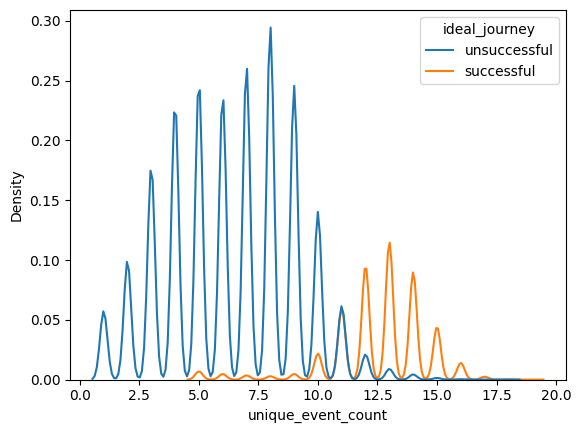

In [ ]:
sns.kdeplot(data=wide_df, x='unique_event_count', hue='ideal_journey')
plt.show()

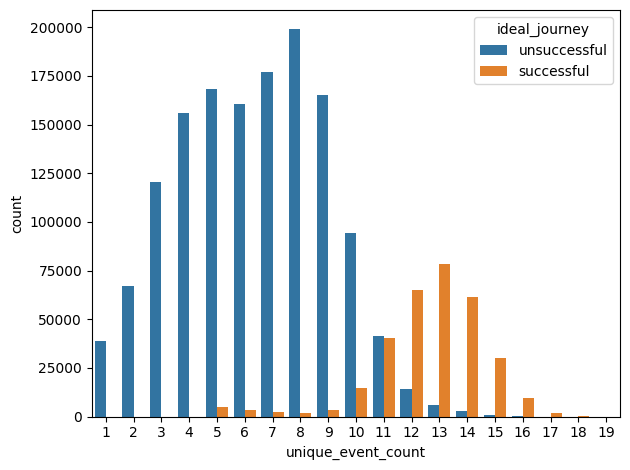

In [ ]:
sns.countplot(data=wide_df, x='unique_event_count', hue='ideal_journey')
plt.tight_layout()  
plt.show()

In [ ]:
ideal_df = wide_df[wide_df['ideal_journey'] == 'successful']
nonideal_df = wide_df[wide_df['ideal_journey'] == 'unsuccessful']

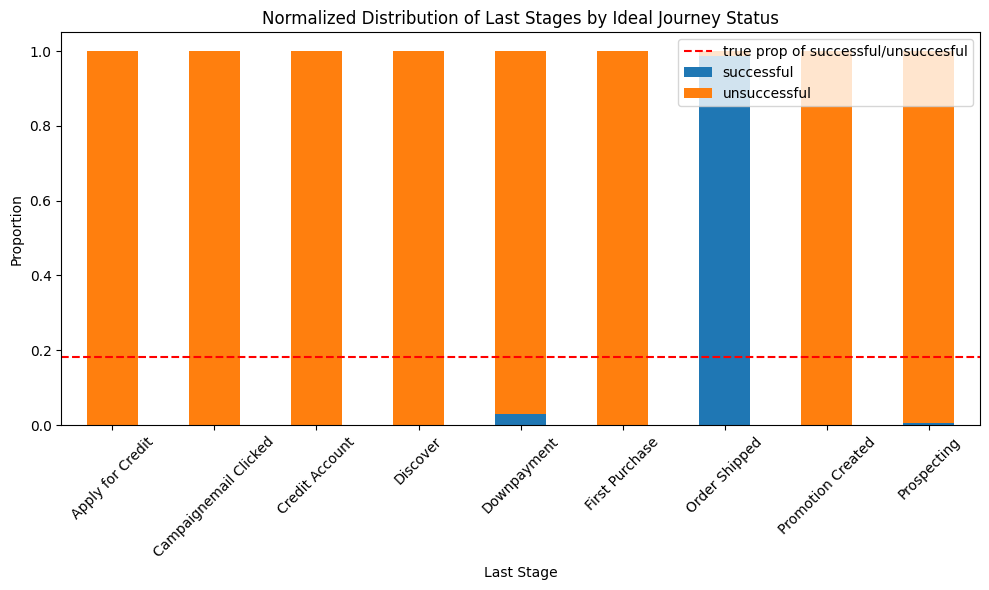

In [ ]:
proportions = wide_df.groupby(['last_stage', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of Last Stages by Ideal Journey Status')
plt.xlabel('Last Stage')
plt.ylabel('Proportion')
plt.axhline(y=0.183241, color='red', linestyle='--', label = 'true prop of successful/unsuccesful')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

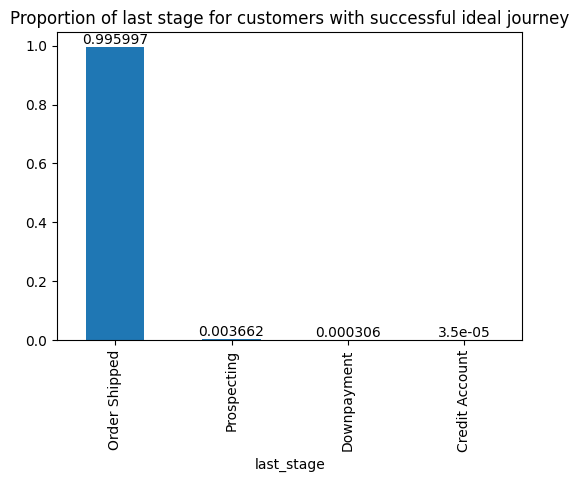

In [ ]:
plt.figure(figsize = (6, 4))
ideal_df['last_stage'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(ideal_df['last_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of last stage for customers with successful ideal journey")
plt.show()

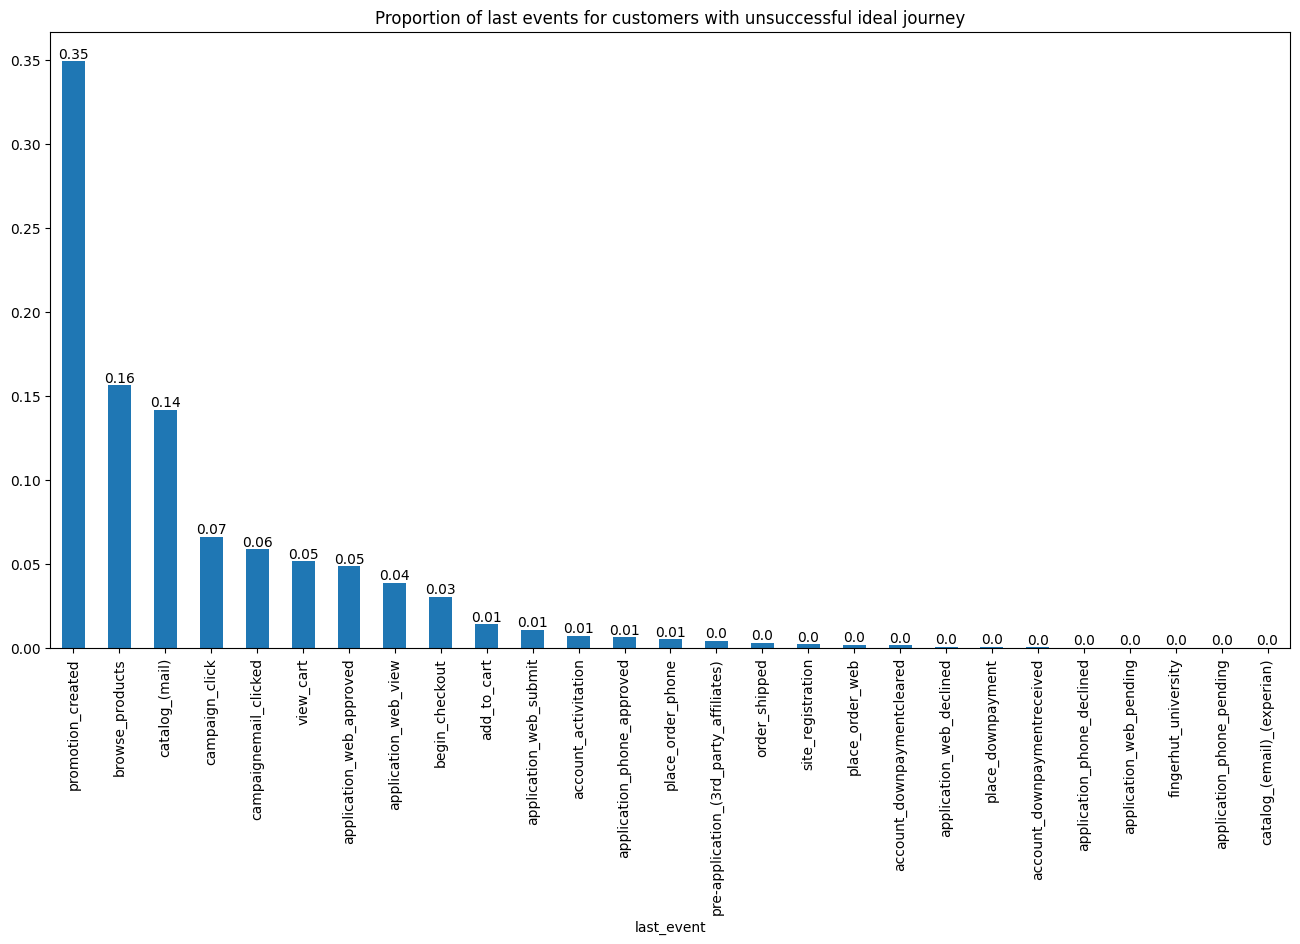

In [ ]:
plt.figure(figsize = (16, 8))
nonideal_df['last_event'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(nonideal_df['last_event'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.title("Proportion of last events for customers with unsuccessful ideal journey")
plt.show()

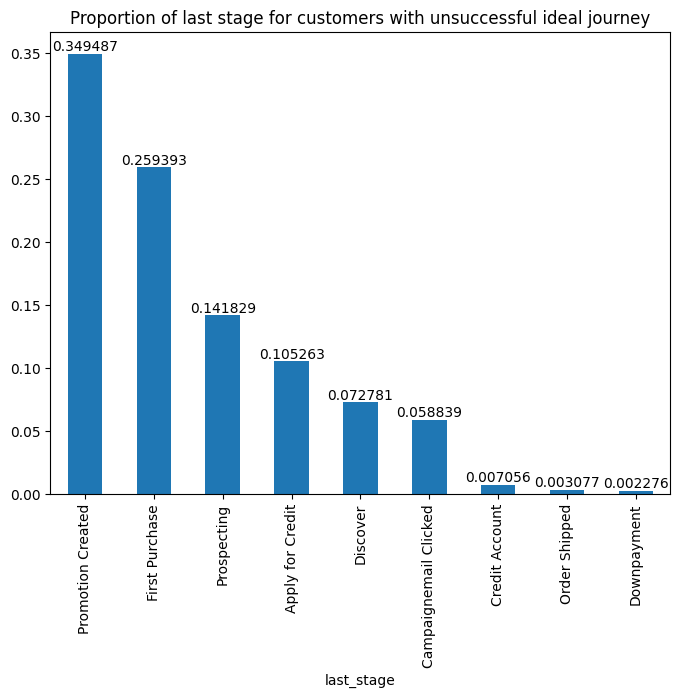

In [ ]:
plt.figure(figsize = (8, 6))
nonideal_df['last_stage'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(nonideal_df['last_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of last stage for customers with unsuccessful ideal journey")
plt.show()

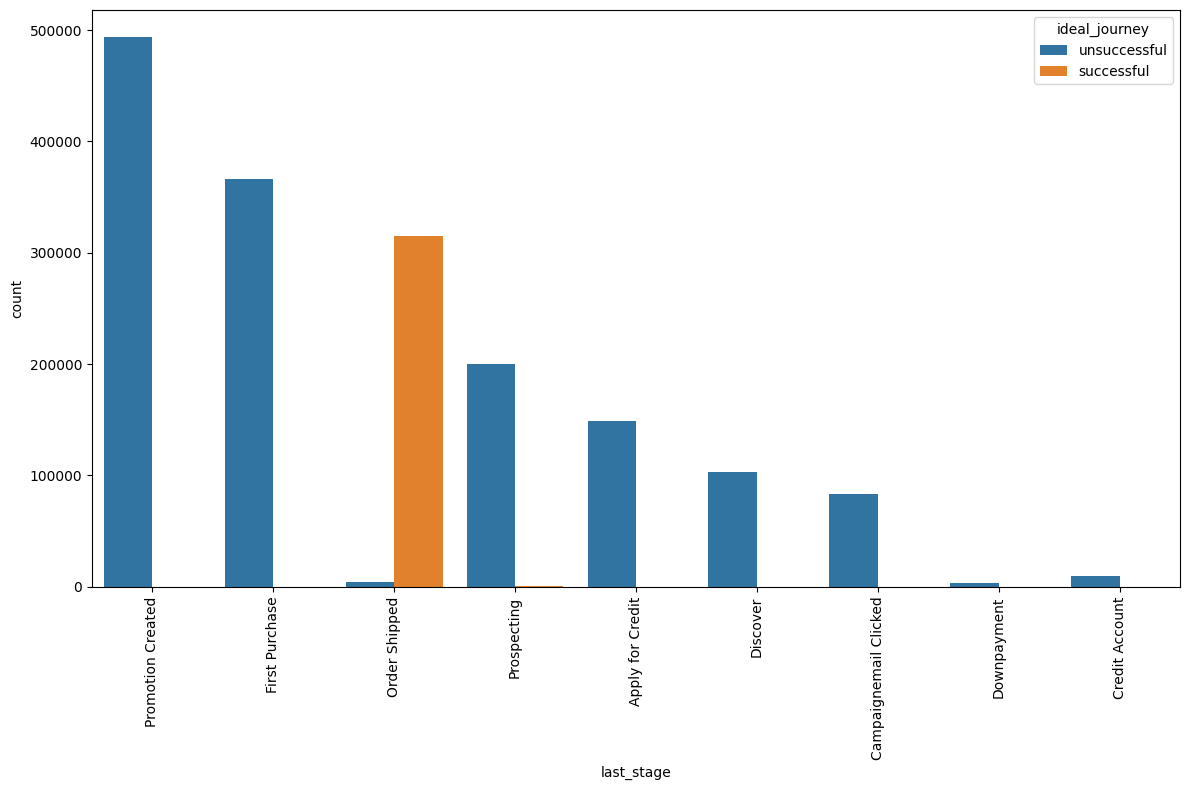

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(data=wide_df, x='last_stage', hue='ideal_journey')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

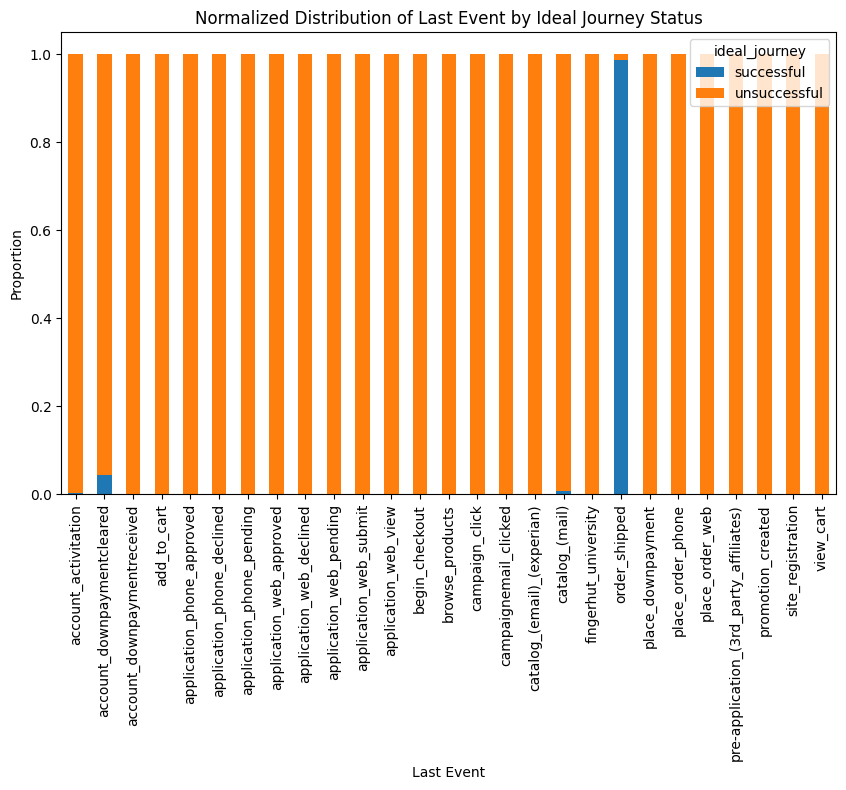

In [ ]:
proportions = wide_df.groupby(['last_event', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of Last Event by Ideal Journey Status')
plt.xlabel('Last Event')
plt.ylabel('Proportion')
plt.xticks(rotation=90) 
plt.show()

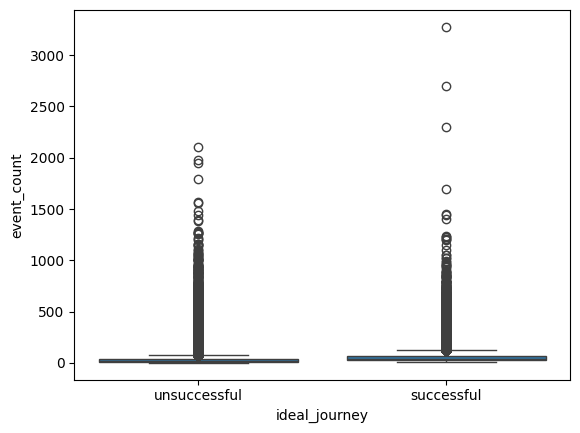

In [ ]:
sns.boxplot(data=wide_df, x='ideal_journey', y='event_count')
plt.show()

In [ ]:
from itertools import chain

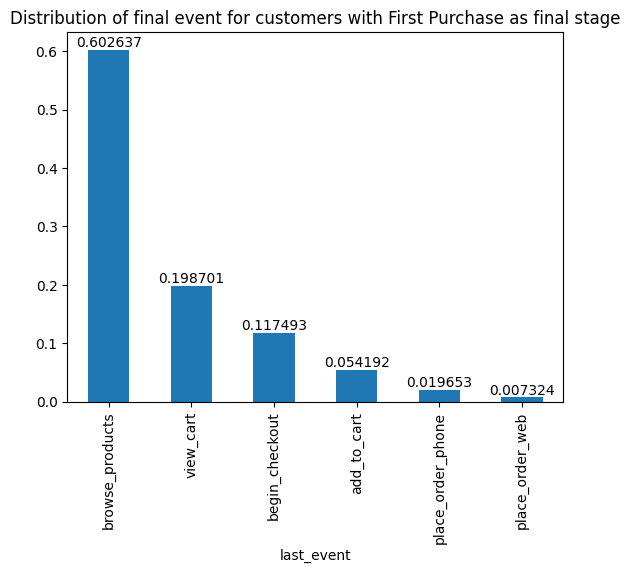

In [ ]:
last_stage_purchase = wide_df[wide_df['last_stage'] == 'First Purchase']
last_stage_purchase['last_event'].value_counts(normalize = True).plot(kind = 'bar')
for i, v in enumerate(last_stage_purchase['last_event'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Distribution of final event for customers with First Purchase as final stage")
plt.show()

In [ ]:
first_purchase_df = wide_df[widf['stage'].apply(lambda stages: 'First Purchase' in stages)]
event_names = list(chain.from_iterable(wide_df['event_name']))
event_name_counts = pd.Series(event_names).value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=event_name_counts.values, y=event_name_counts.index)
plt.xlabel('Counts')
plt.ylabel('Event Names')
plt.title('Counts of Event Names Corresponding to "First Purchase" Stage')
plt.show()

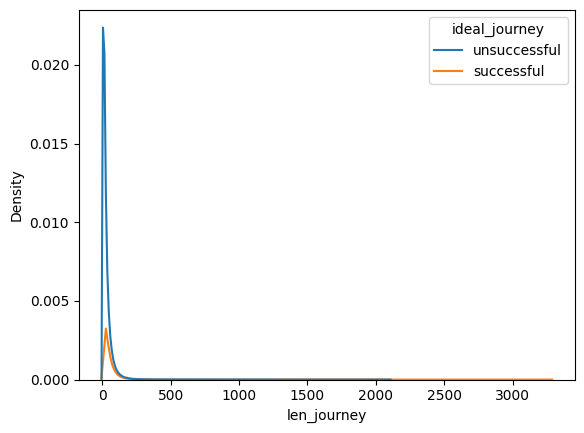

In [ ]:
sns.kdeplot(data=wide_df, x='len_journey', hue='ideal_journey')
plt.show()

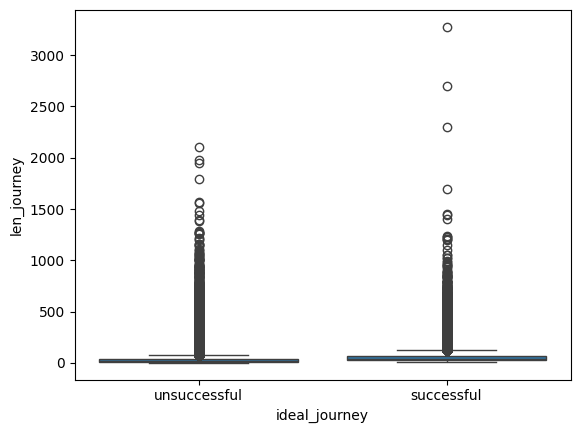

In [ ]:
sns.boxplot(data=wide_df, x='ideal_journey', y='len_journey')
plt.show()

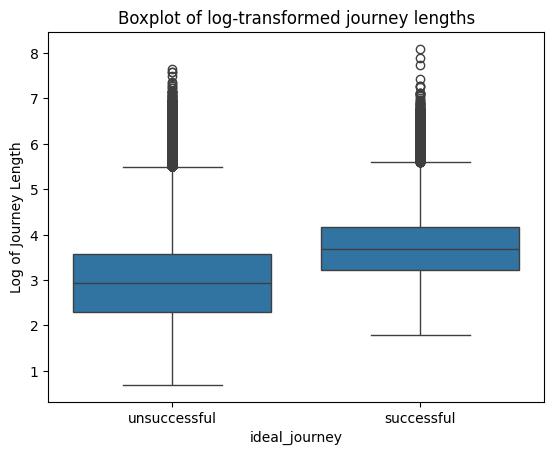

In [ ]:
wide_df['log_len_journey'] = np.log(wide_df['len_journey'] + 1) # log-transformed data
sns.boxplot(data=wide_df, x='ideal_journey', y='log_len_journey')
plt.title('Boxplot of log-transformed journey lengths')
plt.ylabel('Log of Journey Length')
plt.show()

# More Classification Models

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle(("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl"))

In [ ]:
sampled_df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_clustering_sample_df.pkl")

In [ ]:
df

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1728480,2147480051,-148210516,21,1006,7,12,18,0,0,1
1728481,2147480182,-1286764612,12,90,1,6,22,9,0,1
1728482,2147480920,496493954,2,487,3,5,21,6,0,1
1728483,2147482120,-488077144,12,51,1,7,30,15,0,1


In [ ]:
model_df = df.drop(['customer_id', 'account_id'], axis = 1)
X = model_df.drop(['ideal_journey'], axis = 1)
y = model_df['ideal_journey'] # we use ideal_journey rather than order_shipped etc because the two variables have a correlation of 0.99

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
y_train.value_counts()

ideal_journey
0    946061
1    212023
Name: count, dtype: int64

In [ ]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1] # scale weights of imbalanced data 
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       0.87      0.65      0.74    465695
           1       0.27      0.57      0.36    104706

    accuracy                           0.64    570401
   macro avg       0.57      0.61      0.55    570401
weighted avg       0.76      0.64      0.67    570401

ROC AUC Score: 0.6677974466833927


In [ ]:
scale_pos_weight

4.462067794531725

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# Define a parameter grid to search
param_dist = {'n_estimators': randint(100, 500),'learning_rate': uniform(0.01, 0.3),'subsample': uniform(0.7, 0.3),'max_depth': randint(3, 10),
              'colsample_bytree': uniform(0.7, 0.3),'min_child_weight': randint(1, 6)}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, 
                                   scoring='roc_auc', error_score=0, verbose=3, n_jobs=-1, cv=3)
random_search.fit(X_train, y_train)
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best ROC AUC found: {random_search.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.7084991855763053, learning_rate=0.1597002065318124, max_depth=7, min_child_weight=5, n_estimators=108, subsample=0.8450666423031574;, score=0.665 total time=  20.4s
[CV 2/3] END colsample_bytree=0.7084991855763053, learning_rate=0.1597002065318124, max_depth=7, min_child_weight=5, n_estimators=108, subsample=0.8450666423031574;, score=0.666 total time=  20.4s
[CV 3/3] END colsample_bytree=0.7084991855763053, learning_rate=0.1597002065318124, max_depth=7, min_child_weight=5, n_estimators=108, subsample=0.8450666423031574;, score=0.666 total time=  20.6s
[CV 1/3] END colsample_bytree=0.9713443350599842, learning_rate=0.30212087420444406, max_depth=5, min_child_weight=2, n_estimators=168, subsample=0.819289977307222;, score=0.665 total time=  24.1s
[CV 2/3] END colsample_bytree=0.9713443350599842, learning_rate=0.30212087420444406, max_depth=5, min_child_weight=2, n_estimators=168, subsample=0.819

# Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl")
print(df.shape)
df.head()

(1728485, 10)


,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1


In [ ]:
y = df['ideal_journey']
X = df.drop(['customer_id', 'account_id'], axis = 1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

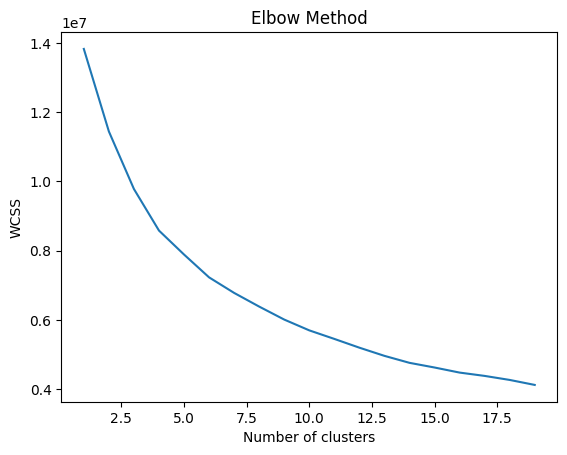

In [ ]:
wcss = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) # multiple initializations
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

In [ ]:
df.head()

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
0,-2147483541,2059949086,12,715,1,10,5,8,0,1,4
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1,4
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1,3
3,-2147474305,1098145658,6,660,5,11,28,22,0,1,0
4,-2147472167,889210381,12,213,1,2,19,8,1,1,3


In [ ]:
import seaborn as sns

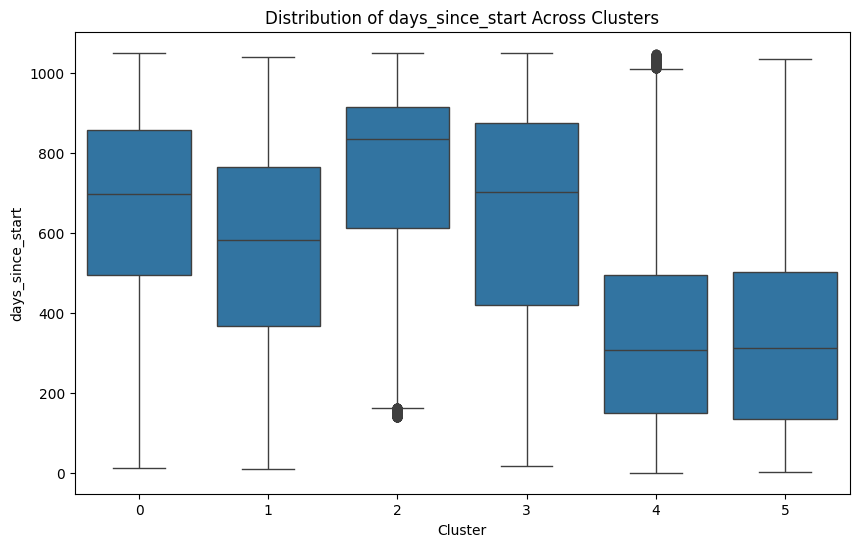

In [ ]:
feature_to_plot = 'first_event'
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

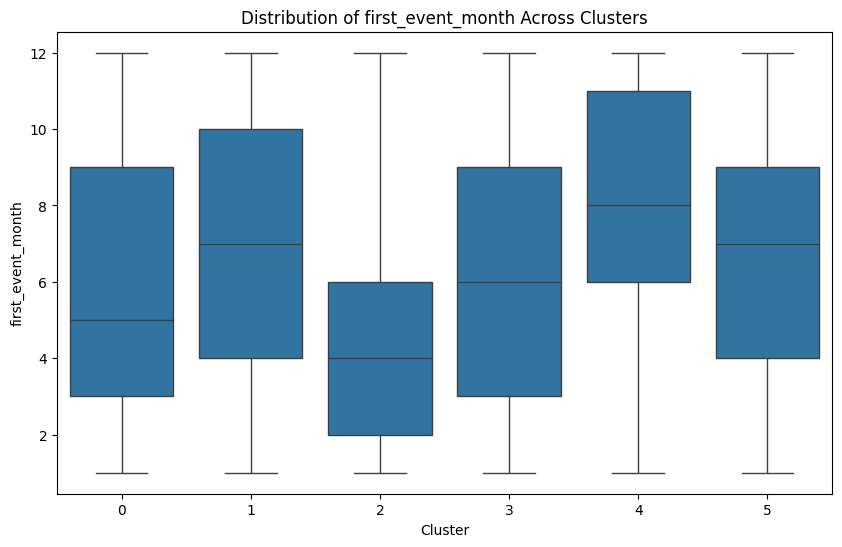

In [ ]:
feature_to_plot = 'first_event_month'
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

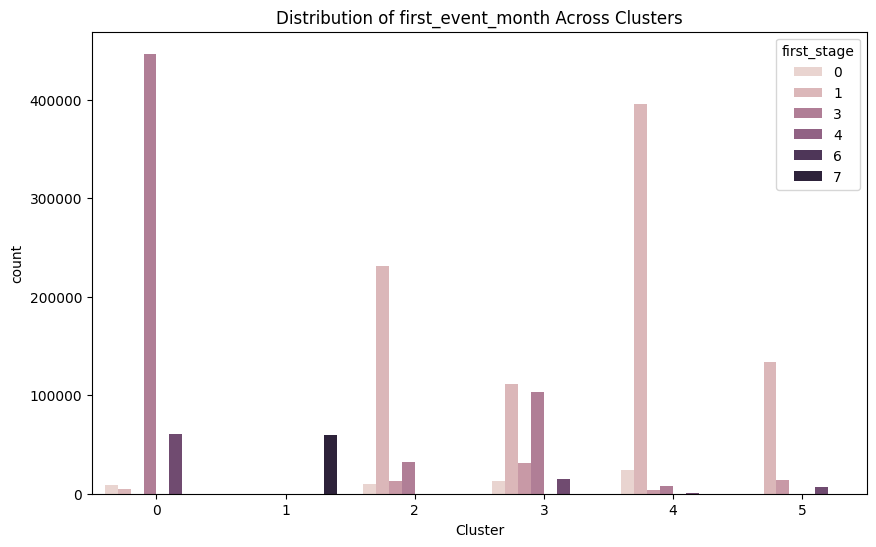

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(hue='first_stage', x='Cluster', data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
print(centers)

   first_event  days_since_start  first_stage  first_event_month  \
0    -1.058130          0.290799     0.717781          -0.084222   
1     1.371440          0.010758     3.260050           0.158246   
2     0.713150          0.711333    -0.563915          -0.635492   
3     0.068054          0.262415    -0.030905          -0.049073   
4     0.348618         -0.744691    -0.728220           0.472144   
5     0.607259         -0.695967    -0.546831           0.176581   

   first_event_day  first_event_hour  ideal_journey  promotion_exposure  
0         0.014012         -0.425597      -0.473657            0.313763  
1        -0.237013         -1.371954      -0.021511            0.311458  
2        -0.005119         -0.019973      -0.473657            0.313905  
3        -0.001171         -0.076837       2.111232            0.313112  
4         0.026405          0.557332      -0.473549            0.313905  
5        -0.017040          0.584474       0.068496           -3.185682  


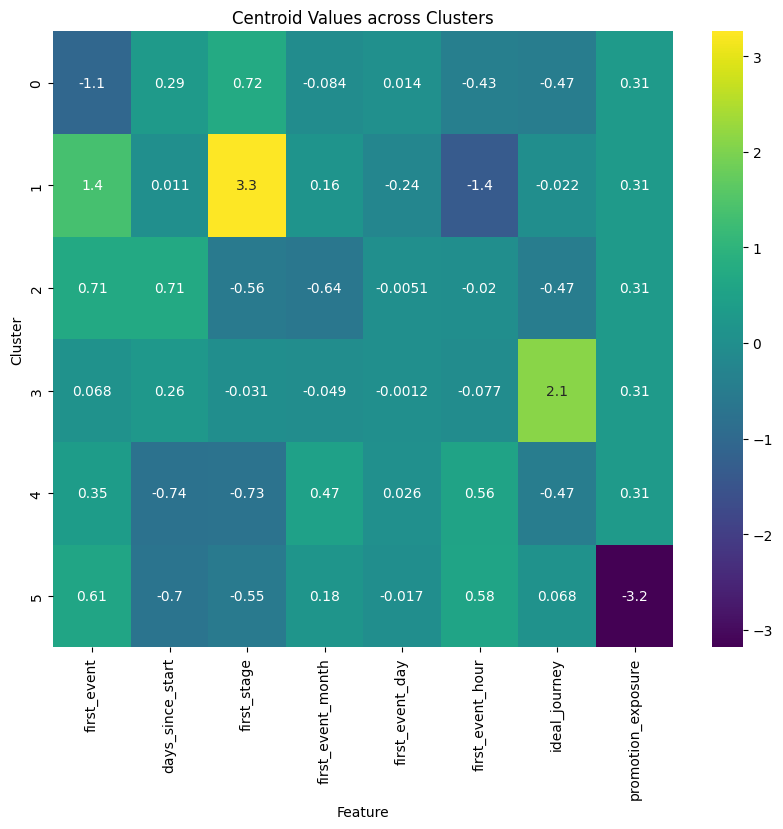

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(centers, annot=True, cmap='viridis')
plt.title('Centroid Values across Clusters')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [ ]:
df.head()

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
0,-2147483541,2059949086,12,715,1,10,5,8,0,1,4
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1,4
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1,3
3,-2147474305,1098145658,6,660,5,11,28,22,0,1,0
4,-2147472167,889210381,12,213,1,2,19,8,1,1,3


In [ ]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0_cust = cluster_0['customer_id'].to_list()
print(cluster_0.shape)

(520615, 11)


In [ ]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1_cust = cluster_1['customer_id'].to_list()
print(cluster_1.shape)

(60085, 11)


In [ ]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2_cust = cluster_2['customer_id'].to_list()
print(cluster_2.shape)

(287676, 11)


In [ ]:
cluster_3 = df[df['Cluster'] == 3]
cluster_3_cust = cluster_3['customer_id'].to_list()
print(cluster_3.shape)

(273712, 11)


In [ ]:
cluster_4 = df[df['Cluster'] == 4]
cluster_4_cust = cluster_4['customer_id'].to_list()
print(cluster_4.shape)

(431481, 11)


In [ ]:
cluster_5 = df[df['Cluster'] == 5]
cluster_5_cust = cluster_5['customer_id'].to_list()
print(cluster_5.shape)

(154916, 11)


## Inspecting entire dataframe per cluster

In [ ]:
df_whole = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [ ]:
cluster_1_df = df_whole[df_whole['customer_id'].isin(cluster_1_cust)]
cluster_2_df = df_whole[df_whole['customer_id'].isin(cluster_2_cust)]
cluster_3_df = df_whole[df_whole['customer_id'].isin(cluster_3_cust)]
cluster_4_df = df_whole[df_whole['customer_id'].isin(cluster_4_cust)]
cluster_5_df = df_whole[df_whole['customer_id'].isin(cluster_5_cust)]

In [ ]:
cluster_0_df = df_whole[df_whole['customer_id'].isin(cluster_0_cust)]
cluster_0_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_0_df.pkl")

In [ ]:
## export cluster dataframes for easy access
cluster_1_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_1_df.pkl")
cluster_2_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_2_df.pkl")
cluster_3_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_3_df.pkl")
cluster_4_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_4_df.pkl")
cluster_5_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_5_df.pkl")

In [ ]:
cluster_1_df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
81,-2147294441,104246387,"[21, 22, 2, 12, 1, 4, 4, 1, 21, 1, 1, 21, 1, 2...","[catalog_(mail), pre-application_(3rd_party_af...","[2021-09-20 00:00:00+00:00, 2021-11-16 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Prospecting, Discover, Discover, Apply for Cr...",0,0
88,-2147279146,-1839022966,"[21, 2, 12, 1, 21, 1, 1, 21]","[catalog_(mail), campaign_click, application_w...","[2022-01-17 00:00:00+00:00, 2022-03-14 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8]","[Prospecting, Discover, Apply for Credit, Prom...",0,0
120,-2147224768,1482557947,"[21, 2, 12, 6, 7, 8, 4, 24, 24, 29, 27, 28]","[catalog_(mail), campaign_click, application_w...","[2021-02-15 00:00:00+00:00, 2021-03-04 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Prospecting, Discover, Apply for Credit, Firs...",1,1
170,-2147070521,-1216506929,"[21, 12, 5]","[catalog_(mail), application_web_approved, vie...","[2022-11-11 00:00:00+00:00, 2022-12-17 13:26:3...","[1, 2, 3]","[Prospecting, Apply for Credit, First Purchase]",0,0
174,-2147057611,-201771542,"[21, 19, 19, 19, 19, 19, 3, 12, 19, 4, 4, 11, ...","[catalog_(mail), application_web_view, applica...","[2021-03-15 00:00:00+00:00, 2021-05-10 12:58:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Prospecting, Apply for Credit, Apply for Cred...",0,0


In [ ]:
def create_flow_counts(df):
    source_target_pairs = []
    for path in df['stage']:
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map to df
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts


def create_flow_counts_events(df):
    source_target_pairs = []
    for path in df['event_name']:
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map to df
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts

In [ ]:
clust_1_flow_counts = create_flow_counts(cluster_1_df)
clust_2_flow_counts = create_flow_counts(cluster_2_df)
clust_3_flow_counts = create_flow_counts(cluster_3_df)
clust_4_flow_counts = create_flow_counts(cluster_4_df)
clust_5_flow_counts = create_flow_counts(cluster_5_df)

In [ ]:
clust_1_flow_counts

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,125033,3,3
1,Apply for Credit,Campaignemail Clicked,2359,3,6
2,Apply for Credit,Credit Account,1028,3,0
3,Apply for Credit,Discover,3827,3,8
4,Apply for Credit,Downpayment,168,3,7
...,...,...,...,...,...
68,Prospecting,Downpayment,63,5,7
69,Prospecting,First Purchase,6500,5,2
70,Prospecting,Order Shipped,133,5,4
71,Prospecting,Promotion Created,50276,5,1


In [ ]:
clust_1_flow_counts[clust_1_flow_counts['source'] == clust_1_flow_counts['target']]

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,125033,3,3
10,Campaignemail Clicked,Campaignemail Clicked,12161,6,6
29,Discover,Discover,5619,8,8
39,Downpayment,Downpayment,3731,7,7
49,First Purchase,First Purchase,724566,2,2
62,Promotion Created,Promotion Created,95442,1,1
72,Prospecting,Prospecting,7815,5,5


## Flow Counts for entire dataframe

In [ ]:
flow_counts = create_flow_counts(df_whole)

In [ ]:
flow_counts

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,7041805,3,3
1,Apply for Credit,Campaignemail Clicked,79595,3,6
2,Apply for Credit,Credit Account,19365,3,0
3,Apply for Credit,Discover,178295,3,8
4,Apply for Credit,Downpayment,5823,3,7
...,...,...,...,...,...
69,Prospecting,Downpayment,2232,5,7
70,Prospecting,First Purchase,239394,5,2
71,Prospecting,Order Shipped,4252,5,4
72,Prospecting,Promotion Created,1360044,5,1


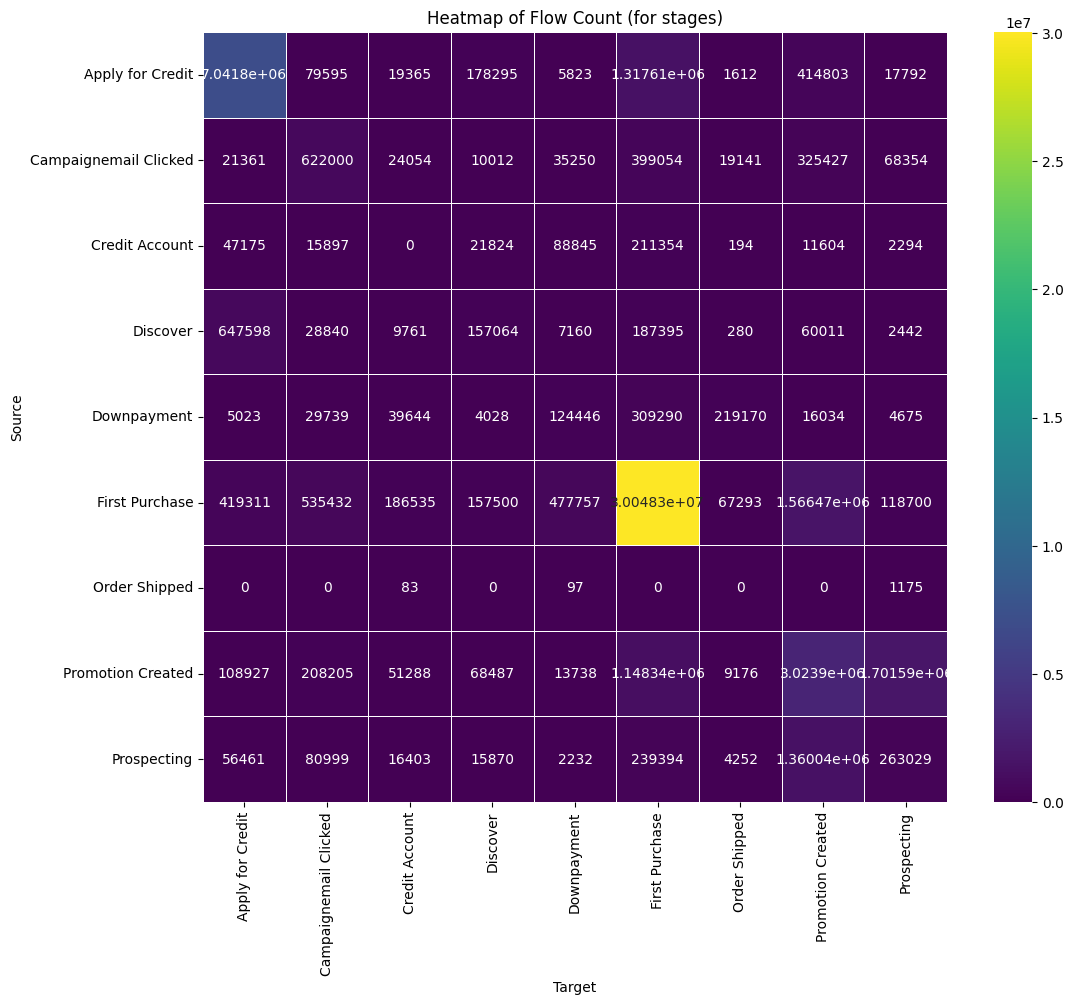

In [ ]:
stage_flow_df = flow_counts.pivot_table(index='source', columns='target', values='value', aggfunc='sum')
stage_flow_df = stage_flow_df.fillna(0)
plt.figure(figsize=(12, 10)) 
sns.heatmap(stage_flow_df, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Heatmap of Flow Count (for stages)')
plt.ylabel('Source')
plt.xlabel('Target')
plt.show()

In [ ]:
flow_counts[flow_counts['source'] == flow_counts['target']]

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,7041805,3,3
10,Campaignemail Clicked,Campaignemail Clicked,622000,6,6
29,Discover,Discover,157064,8,8
39,Downpayment,Downpayment,124446,7,7
49,First Purchase,First Purchase,30048259,2,2
63,Promotion Created,Promotion Created,3023899,1,1
73,Prospecting,Prospecting,263029,5,5


### Take a closer look at event flows where stage is First Purchase

In [ ]:
event_flow_counts = create_flow_counts_events(df_whole)
event_flow_counts

,source,target,value,source_id,target_id
0,account_activitation,account_downpaymentcleared,77770,18,6
1,account_activitation,account_downpaymentreceived,1786,18,19
2,account_activitation,add_to_cart,4366,18,15
3,account_activitation,application_phone_approved,3349,18,24
4,account_activitation,application_phone_declined,24,18,2
...,...,...,...,...,...
544,view_cart,place_order_web,8308,0,20
545,view_cart,pre-application_(3rd_party_affiliates),677,0,22
546,view_cart,promotion_created,302074,0,4
547,view_cart,site_registration,5225,0,16


In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
first_purchase = list(def_df[def_df['stage'] == 'First Purchase']['event_name'].values)

In [ ]:
first_purchase_flow_df = event_flow_counts[(event_flow_counts['source'].isin(first_purchase)) & (event_flow_counts['target'].isin(first_purchase))]
# first_purchase_flow_df = first_purchase_flow_df[first_purchase_flow_df['source'] != first_purchase_flow_df['target']]
first_purchase_flow_df

,source,target,value,source_id,target_id
61,add_to_cart,add_to_cart,73384,15,15
69,add_to_cart,begin_checkout,96941,15,7
70,add_to_cart,browse_products,1850246,15,10
77,add_to_cart,place_order_phone,383,15,12
78,add_to_cart,place_order_web,5355,15,20
82,add_to_cart,view_cart,1795520,15,0
231,begin_checkout,add_to_cart,47627,7,15
239,begin_checkout,begin_checkout,232073,7,7
240,begin_checkout,browse_products,249841,7,10
247,begin_checkout,place_order_phone,1942,7,12


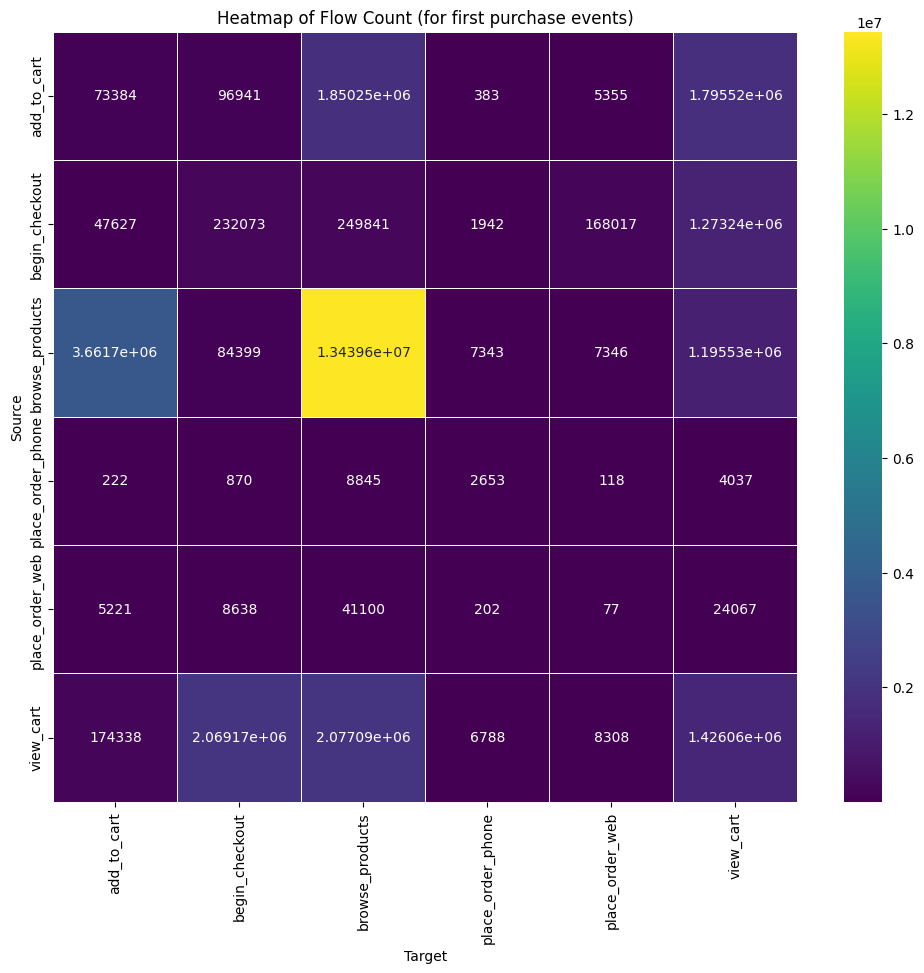

In [ ]:
fp_flow = first_purchase_flow_df.pivot_table(index='source', columns='target', values='value', aggfunc='sum')
fp_flow = fp_flow.fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(fp_flow, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Heatmap of Flow Count (for first purchase events)')
plt.ylabel('Source')
plt.xlabel('Target')
plt.show()